<a href="https://colab.research.google.com/github/Ganesh-VG/World-Bank-Global-Education-Analysis/blob/main/World_Bank_Global_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    **World Bank Global Education Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

The World Bank Global Education Analysis Project aims to provide a comprehensive overview of the state of education across various countries and regions worldwide. This project involves collecting, analyzing, and visualizing education-related data obtained from sources such as national surveys, international assessments, and official statistics.

Through the World Bank Global Education Analysis Project, stakeholders can gain valuable insights into the current state of education, monitor progress towards educational goals, and make informed decisions to support the development of inclusive and high-quality education systems globally.

# **GitHub Link -**

https://github.com/Ganesh-VG/Ganesh_Projects/blob/6e7a6be3aff307c188ed4fd62f8e44e97d84ba99/1DataScience_World_Bank_Global_Education_Analysis.ipynb

# **Problem Statement**


Despite significant progress in expanding access to education globally, disparities persist in terms of quality, equity, and learning outcomes. The World Bank aims to address these challenges through the Global Education Analysis Project by collecting, analyzing, and visualizing education-related data from diverse sources. The project seeks to identify key trends, patterns, and disparities in education across countries and regions, with a focus on improving access, quality, and equity in education. By leveraging data-driven insights, the project aims to inform policy-making, support evidence-based decision-making, and promote collaboration to achieve the Sustainable Development Goal of ensuring inclusive and equitable quality education for all.

#### **Define Your Objective?**

* Identify key trends and patterns in education access, quality, and equity.
* Highlight disparities and challenges faced by different countries and regions.
* Provide insights into effective policies and interventions to improve education outcomes.
* Support evidence-based decision-making by policymakers, educators, and stakeholders.
* Foster collaboration and knowledge-sharing among countries and organizations to achieve the Sustainable Development Goal of inclusive and equitable quality education for all.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import requests
import zipfile
import pandas as pd
from io import BytesIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

### Dataset Loading

In [ ]:
# URL of the zip file
zip_url = 'https://databank.worldbank.org/data/download/EdStats_CSV.zip'

# Send an HTTP GET request to the URL
response = requests.get(zip_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the content of the response as a zip file
    zip_data = zipfile.ZipFile(BytesIO(response.content))

    # List all files in the zip archive
    zip_file_list = zip_data.namelist()

    # Iterate through each file in the zip archive
    for file_name in zip_file_list:
        # Check if the file is a CSV file
        if file_name == 'EdStatsData.csv':
            # Extract the CSV file from the zip archive
            with zip_data.open(file_name) as csv_file:
                # Read the CSV file into a DataFrame
                df = pd.read_csv(csv_file)

else:
    print('Failed to download the zip file')



#### Filtering out columns with null data

In [ ]:
# droping columns containing only null values.

df = df.dropna(axis=1, how='all')

### Dataset First View

In [ ]:
# Dataset First Look

df.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2055  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2060  2065  2070  2075  2080  2085  2090  2095  2100  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print("Number of rows in dataframe:", df.shape[0])
print("Number of columns in dataframe:", df.shape[1])

Number of rows in dataframe: 886930
Number of columns in dataframe: 69


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Number of duplicate values in a dataframe:", len(df[df.duplicated()]))

Number of duplicate values in a dataframe: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2080              835494
2085              835494
2090              835494
2095              835494
2100              835494
Length: 69, dtype: int64


<Axes: >

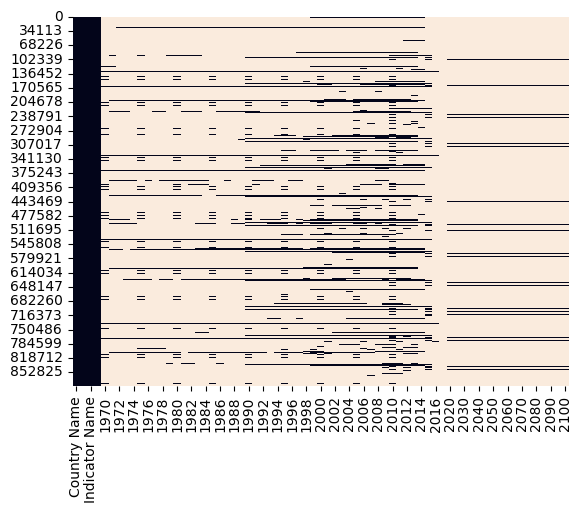

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

#### **Indicators used for survey.**

In [ ]:
print("Number of indicators used for survey:", len(df['Indicator Name'].unique()))

Number of indicators used for survey: 3665


In [ ]:
print("number of countries present in the dataset:", len(df['Country Name'].unique()))

number of countries present in the dataset: 242


In [ ]:
# uncomment the below code to view all the indicators used in the survey.

# for each in df['Indicator Name'].unique():
#   print(each)

### What did you know about your dataset?

World bank Education statistics is the extensive survey carried out by world bank across the world based on several indicators.Thae dataset contains data of 217 countries and 25 country groups. The dataset contains 886930 rows and 69 columns. It consist of 3665 indicators which can be used to analyse the dataset in various viewpoints. dataset has not got any duplicate values. It has got maximum amount of data for the years between 2012 and 2014.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

Country Name Country Code  \
count        886930       886930   
unique          242          242   
top      Arab World          ARB   
freq           3665         3665   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                           Indicator Name Indicator Code  \
count                                              886930         886930   
unique                                               3665           3665   
top     Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   
freq                                                  242            242   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

                1970          1971          1972          1973          1974  \
count   7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std     1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min    -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%     8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%     6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%     6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max     1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

                1975  ...          2055          2060          2065  \
count   8.730600e+04  ...  5.143600e+04  5.143600e+04  5.143600e+04   
unique           NaN  ...           NaN           NaN           NaN   
top              NaN  ...           NaN           NaN           NaN   
freq             NaN  ...           NaN           NaN           NaN   
mean    2.314288e+09  ...  7.145788e+02  7.224868e+02  7.271290e+02   
std     1.375059e+11  ...  2.136851e+04  2.215845e+04  2.287990e+04   
min    -3.658569e+00  ... -1.830000e+00 -1.630000e+00 -1.440000e+00   
25%     1.400000e+00  ...  3.000000e-02  3.000000e-02  3.000000e-02   
50%     9.677420e+00  ...  2.300000e-01  2.300000e-01  2.300000e-01   
75%     7.854163e+01  ...  7.500000e+00  7.505000e+00  7.500000e+00   
max     2.300634e+13  ...  2.813670e+06  2.951569e+06  3.070879e+06   

                2070          2075          2080          2085          2090  \
count   5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    7.283779e+02  7.266484e+02  7.228327e+02  7.176899e+02  7.113072e+02   
std     2.352338e+04  2.408149e+04  2.455897e+04  2.496587e+04  2.530183e+04   
min    -1.260000e+00 -1.090000e+00 -9.200000e-01 -7.800000e-01 -6.500000e-01   
25%     2.000000e-02  2.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%     2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%     7.300000e+00  7.100000e+00  6.722500e+0

### Variables Description

* **Country Name:** Name of the country where the survey was conducted.
* **Country Code:** Country code of the country where the survey was conducted.
* **Indicator Name:** Indicators for which the survey was conducted.
* **Indicator Code:** Indicator code of the Indicators for which the survey was conducted.
* **Years:** years for which the survey was conducted. There are also years where in the data has been filled by prediction. Where the data from the present surveyed years have been used to predict the future data.


### Check Unique Values for each variable.

In [ ]:
# unique values for country name.
df['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [ ]:
# number of countries considered for survey
len(df['Country Name'].unique())

242

In [ ]:
# total number of indicators over which the survey was conducted.
len(df['Indicator Name'].unique())

3665

## 3. ***Data Wrangling***

* For all the data wrangling process I will consider data of most recent year with highest non-null value that is year '2013'.
* I will filter indicators based on availability of data and sort it accordingly so that i can only consider indictors with maximum data availability.


In [ ]:
# Group the DataFrame by the 'Indicator Name' column count number of countries for which data is available.
grouped_df = df.groupby(['Indicator Name'])['2013'].count()

# convert the grouped data into dataframe.
grouped_df = pd.DataFrame(grouped_df)

# remane column name to 'number of non-null data'.
grouped_df = grouped_df.rename(columns={'2013': 'Number of non-null data'})

# sort out indicators which have got data for less than 100 countries.
grouped_df = grouped_df[grouped_df['Number of non-null data'] > 50]

# display sorted non null values in descending order in order to choose indicators withs highest country coverage.
grouped_df.sort_values(by = ['Number of non-null data'], ascending = False)


Number of non-null data
Indicator Name                                                             
Population, total                                                       239
Population growth (annual %)                                            239
Internet users (per 100 people)                                         226
GDP at market prices (current US$)                                      225
GDP per capita (current US$)                                            225
...                                                                     ...
Expenditure on pre-primary as % of government e...                       51
UIS: Percentage of population age 25+ with at l...                       51
UIS: Percentage of population age 25+ with at l...                       51
UIS: Percentage of population age 25+ with at l...                       51
UIS: Percentage of population age 25+ with at l...                       51

[957 rows x 1 columns]

### Data Wrangling Code

In [ ]:
# Creating dataframe containing country and their respective population in 2013 sorted in descending order of their population.
df_top_population = df[['Country Name', '2013']][df['Indicator Name'] == 'Population, total'].sort_values(by = '2013', ascending = False).dropna()

# Remaning the column heading to suit its character.
df_top_population = df_top_population.rename(columns={'2013': 'population'})

# Reset index.
df_top_population.reset_index(inplace = True)

# Drop old index column.
df_top_population.drop(columns=['index'], inplace=True)

# Display dataframe
df_top_population.head()

Country Name    population
0                World  7.182860e+09
1  Low & middle income  6.014016e+09
2        Middle income  5.406029e+09
3  Lower middle income  2.884574e+09
4  Upper middle income  2.521455e+09

In [ ]:
# Creating dataframe containing country and their respective GDP per capita.
df_GDP_per_capita = df[['Country Name', '2013']][df['Indicator Name'] == 'GDP per capita (current US$)']

# Remaning the column heading to suit its character.
df_GDP_per_capita = df_GDP_per_capita.rename(columns={'2013': 'GDP per capita($)'})

# Display dataframe
df_GDP_per_capita.head()

Country Name  GDP per capita($)
1245                                    Arab World        7715.998677
4910                           East Asia & Pacific        9447.701067
8575   East Asia & Pacific (excluding high income)        5908.427878
12240                                    Euro area       39107.504583
15905                        Europe & Central Asia       25976.554634

In [ ]:
# Dataframe sorted in descending order of their percapita income.
df_GDP_per_capita_sorted = df_GDP_per_capita.sort_values(by = 'GDP per capita($)', ascending = False).dropna()

# Display dataframe
df_GDP_per_capita_sorted.head()

Country Name  GDP per capita($)
507015     Liechtenstein      173528.150454
514345        Luxembourg      113625.132900
627960            Norway      103059.248228
518010  Macao SAR, China       89524.844361
671940             Qatar       88304.879575

In [ ]:
# Creating dataframe containing country and their respective Unemployment percentage.
df_Unemployment_rate = df[['Country Name', '2013']][df['Indicator Name'] == 'Unemployment, total (% of total labor force)']

# Remaning the column heading to suit its character.
df_Unemployment_rate = df_Unemployment_rate.rename(columns={'2013': 'Unemployment percentage'})

# Display dataframe
df_Unemployment_rate.head()

Country Name  Unemployment percentage
3348                                    Arab World                11.413681
7013                           East Asia & Pacific                 4.352350
10678  East Asia & Pacific (excluding high income)                 4.391273
14343                                    Euro area                11.992408
18008                        Europe & Central Asia                 9.291556

In [ ]:
# Creating dataframe containing country and their respective Adult illiterate population(15+ years).
df_Adult_illiterate_population = df[['Country Name', '2013']][df['Indicator Name'] == 'Adult illiterate population, 15+ years, both sexes (number)']

# Remaning the column heading to suit its character.
df_Adult_illiterate_population = df_Adult_illiterate_population.rename(columns={'2013': 'Adult Illiterate Population'})

# Display dataframe
df_Adult_illiterate_population.head()

Country Name  \
17                                      Arab World   
3682                           East Asia & Pacific   
7347   East Asia & Pacific (excluding high income)   
11012                                    Euro area   
14677                        Europe & Central Asia   

       Adult Illiterate Population  
17                      55698608.0  
3682                           NaN  
7347                           NaN  
11012                          NaN  
14677                    7508956.0

In [ ]:
# Creating dataframe containing country and their respective internet users per 100 people.
df_Internet_users_per_100_people = df[['Country Name', '2013']][df['Indicator Name'] == 'Internet users (per 100 people)']

# Remaning the column heading to suit its character.
df_Internet_users_per_100_people = df_Internet_users_per_100_people.rename(columns={'2013': 'Internet users (per 100 people)'})

# Display dataframe
df_Internet_users_per_100_people.head()

Country Name  \
1375                                    Arab World   
5040                           East Asia & Pacific   
8705   East Asia & Pacific (excluding high income)   
12370                                    Euro area   
16035                        Europe & Central Asia   

       Internet users (per 100 people)  
1375                         36.868602  
5040                         44.577349  
8705                         39.708933  
12370                        75.821560  
16035                        66.306669

In [ ]:
# Creating dataframe containing country and their respective internet users per 100 people.
df_Population_ages_15_64 = df[['Country Name', '2013']][df['Indicator Name'] == 'Population, ages 15-64, total']

# Remaning the column heading to suit its character.
df_Population_ages_15_64 = df_Population_ages_15_64.rename(columns={'2013': 'Population ages 15-64'})

# Display dataframe
df_Population_ages_15_64.head()

Country Name  Population ages 15-64
2486                                    Arab World           2.334388e+08
6151                           East Asia & Pacific           1.593141e+09
9816   East Asia & Pacific (excluding high income)           1.430662e+09
13481                                    Euro area           2.209266e+08
17146                        Europe & Central Asia           6.030064e+08

In [ ]:
# Creating dataframe containing country and their respective internet users per 100 people.
df_Population_ages_0_14 = df[['Country Name', '2013']][df['Indicator Name'] == 'Population, ages 0-14, total']

# Remaning the column heading to suit its character.
df_Population_ages_0_14 = df_Population_ages_0_14.rename(columns={'2013': 'Population ages 0-14'})

# Display dataframe
df_Population_ages_0_14.head()

Country Name  Population ages 0-14
2422                                    Arab World           120815435.0
6087                           East Asia & Pacific           451592449.0
9752   East Asia & Pacific (excluding high income)           416775373.0
13417                                    Euro area            51473573.0
17082                        Europe & Central Asia           157550306.0

In [ ]:
# Creating dataframe containing country and their respective Enrolment in primary education.
df_Enrolment_in_primary_education = df[['Country Name', '2013']][df['Indicator Name'] == 'Enrolment in primary education, both sexes (number)']

# Remaning the column heading to suit its character.
df_Enrolment_in_primary_education = df_Enrolment_in_primary_education.rename(columns={'2013': 'Enrolment in primary education'})

# Display dataframe
df_Enrolment_in_primary_education.head()

Country Name  \
1183                                    Arab World   
4848                           East Asia & Pacific   
8513   East Asia & Pacific (excluding high income)   
12178                                    Euro area   
15843                        Europe & Central Asia   

       Enrolment in primary education  
1183                       43670856.0  
4848                      184159808.0  
8513                      171312032.0  
12178                      18138392.0  
15843                      48872400.0

In [ ]:
# Creating dataframe containing country and their respective Population of the official age for primary education.
df_Gender_Parity_Index = df[['Country Name', '2013']][df['Indicator Name'] == 'Gross enrolment ratio, primary, gender parity index (GPI)']

# Remaning the column heading to suit its character.
df_Gender_Parity_Index = df_Gender_Parity_Index.rename(columns={'2013': 'Gross enrolment ratio, primary, gender parity index (GPI)'})

# Display dataframe
df_Gender_Parity_Index.head()

Country Name  \
1333                                    Arab World   
4998                           East Asia & Pacific   
8663   East Asia & Pacific (excluding high income)   
12328                                    Euro area   
15993                        Europe & Central Asia   

       Gross enrolment ratio, primary, gender parity index (GPI)  
1333                                             0.93174          
4998                                             0.99159          
8663                                             0.99157          
12328                                            0.99517          
15993                                            0.99731

In [ ]:
# Creating dataframe containing country and their respective number of teachers in primary education.
df_Teachers_in_primary_education= df[['Country Name', '2013']][df['Indicator Name'] == 'Teachers in primary education, both sexes (number)']

# Remaning the column heading to suit its character.
df_Teachers_in_primary_education = df_Teachers_in_primary_education.rename(columns={'2013': 'Teachers in primary education'})

# Display dataframe
df_Teachers_in_primary_education.head()

Country Name  \
2968                                    Arab World   
6633                           East Asia & Pacific   
10298  East Asia & Pacific (excluding high income)   
13963                                    Euro area   
17628                        Europe & Central Asia   

       Teachers in primary education  
2968                    2.150729e+06  
6633                    1.035178e+07  
10298                   9.585277e+06  
13963                   1.395078e+06  
17628                   3.297692e+06

In [ ]:
# Creating dataframe containing country and their respective Primary completion rate.
df_Primary_completion_rate = df[['Country Name', '2013']][df['Indicator Name'] == 'Primary completion rate, both sexes (%)']

# Remaning the column heading to suit its character.
df_Primary_completion_rate = df_Primary_completion_rate.rename(columns={'2013': 'Primary completion rate'})

# Display dataframe
df_Primary_completion_rate.head()

Country Name  Primary completion rate
2535                                    Arab World                85.149277
6200                           East Asia & Pacific               101.624847
9865   East Asia & Pacific (excluding high income)               101.576485
13530                                    Euro area                97.863243
17195                        Europe & Central Asia                98.869942

In [ ]:
# Creating dataframe containing country and their respective Enrolment in secondary.
df_Enrolment_in_secondary = df[['Country Name', '2013']][df['Indicator Name'] == 'Enrolment in secondary general, both sexes (number)']

# Remaning the column heading to suit its character.
df_Enrolment_in_secondary = df_Enrolment_in_secondary.rename(columns={'2013': 'Enrolment in secondary'})

# Display dataframe
df_Enrolment_in_secondary.head()

Country Name  Enrolment in secondary
1197                                    Arab World              28205540.0
4862                           East Asia & Pacific             130745872.0
8527   East Asia & Pacific (excluding high income)             118249848.0
12192                                    Euro area              21043226.0
15857                        Europe & Central Asia              60680360.0

In [ ]:
# Creating dataframe containing Teachers in secondary education.
df_Teachers_in_secondary = df[['Country Name', '2013']][df['Indicator Name'] == 'Teachers in secondary education, both sexes (number)']

# Remaning the column heading to suit its character.
df_Teachers_in_secondary = df_Teachers_in_secondary.rename(columns={'2013': 'Teachers in secondary'})

# Display dataframe
df_Teachers_in_secondary.head()

Country Name  Teachers in secondary
2970                                    Arab World           2.070003e+06
6635                           East Asia & Pacific           1.003830e+07
10300  East Asia & Pacific (excluding high income)           8.946526e+06
13965                                    Euro area           2.422539e+06
17630                        Europe & Central Asia           6.700810e+06

In [ ]:
# Creating dataframe containing Enrolment in tertiary education, all programmes.
df_Enrolment_in_tertiary = df[['Country Name', '2013']][df['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']

# Remaning the column heading to suit its character.
df_Enrolment_in_tertiary = df_Enrolment_in_tertiary.rename(columns={'2013': 'Enrolment in tertiary education'})

# Display dataframe
df_Enrolment_in_tertiary.head()

Country Name  \
1204                                    Arab World   
4869                           East Asia & Pacific   
8534   East Asia & Pacific (excluding high income)   
12199                                    Euro area   
15864                        Europe & Central Asia   

       Enrolment in tertiary education  
1204                         9688632.0  
4869                        60916176.0  
8534                        51471764.0  
12199                       12884160.0  
15864                       38299848.0

In [ ]:
# Creating dataframe containing country and their respective Population of the official entrance age to secondary general education.
df_GDP = df[['Country Name', '2013']][df['Indicator Name'] == 'GDP at market prices (current US$)']

# Remaning the column heading to suit its character.
df_GDP = df_GDP.rename(columns={'2013': 'GDP at market prices (current US$)'})

# Display dataframe
df_GDP.head()

Country Name  \
1243                                    Arab World   
4908                           East Asia & Pacific   
8573   East Asia & Pacific (excluding high income)   
12238                                    Euro area   
15903                        Europe & Central Asia   

       GDP at market prices (current US$)  
1243                         2.853079e+12  
4908                         2.126254e+13  
8573                         1.186078e+13  
12238                        1.319084e+13  
15903                        2.334916e+13

In [ ]:
# Creating dataframe containing country and their respective Government expenditure on education as % of GDP.
df_Government_expenditure_on_education_as_GDP = df[['Country Name', '2013']][df['Indicator Name'] == 'Government expenditure on education as % of GDP (%)']

# Remaning the column heading to suit its character.
df_Government_expenditure_on_education_as_GDP = df_Government_expenditure_on_education_as_GDP.rename(columns={'2013': 'Government expenditure on education(% of GDP)'})

# Display dataframe
df_Government_expenditure_on_education_as_GDP.head()

Country Name  \
1260                                    Arab World   
4925                           East Asia & Pacific   
8590   East Asia & Pacific (excluding high income)   
12255                                    Euro area   
15920                        Europe & Central Asia   

       Government expenditure on education(% of GDP)  
1260                                             NaN  
4925                                             NaN  
8590                                             NaN  
12255                                            NaN  
15920                                            NaN

In [ ]:
# Creating dataframe containing country and their respective Expenditure on education as % of total government expenditure.
df_Government_expenditure_on_education_of_total_expenditure = df[['Country Name', '2013']][df['Indicator Name'] == 'Expenditure on education as % of total government expenditure (%)']

# Remaning the column heading to suit its character.
df_Government_expenditure_on_education_of_total_expenditure = df_Government_expenditure_on_education_of_total_expenditure.rename(columns={'2013': 'Government expenditure on education as % of total government expenditure'})

# Display dataframe
df_Government_expenditure_on_education_of_total_expenditure.head()

Country Name  \
1224                                    Arab World   
4889                           East Asia & Pacific   
8554   East Asia & Pacific (excluding high income)   
12219                                    Euro area   
15884                        Europe & Central Asia   

       Government expenditure on education as % of total government expenditure  
1224                                                 NaN                         
4889                                                 NaN                         
8554                                                 NaN                         
12219                                                NaN                         
15884                                                NaN

In [ ]:
# List of dataframes
dfs = [df_top_population, df_GDP_per_capita, df_Unemployment_rate, df_Adult_illiterate_population, df_Internet_users_per_100_people, df_Population_ages_15_64, df_Population_ages_0_14, df_Enrolment_in_primary_education, df_Gender_Parity_Index, df_Teachers_in_primary_education, df_Primary_completion_rate, df_Enrolment_in_secondary, df_Teachers_in_secondary, df_Enrolment_in_tertiary, df_GDP, df_Government_expenditure_on_education_as_GDP, df_Government_expenditure_on_education_of_total_expenditure]

# Define the key on which to join
key = 'Country Name'

# Perform the join using reduce
final_df = reduce(lambda left, right: pd.merge(left, right, on=key), dfs)

In [ ]:
# Add column containing total internet users and Percentage of internet users in country to dataframe.
final_df['Total internet users'] = final_df['population'] * final_df['Internet users (per 100 people)'] / 100
final_df['Percentage of internet users'] = (final_df['Total internet users'] / final_df['population']) *100

In [ ]:
# Add column containing Government expenditure on education to dataframe.
final_df['Government expenditure on education'] = (final_df['Government expenditure on education(% of GDP)'] * final_df['GDP at market prices (current US$)']) / 100

In [ ]:
final_df['teacher per Enrolled student in primary education'] = final_df['Teachers in primary education'] / final_df['Enrolment in primary education']

In [ ]:
final_df['Enrolled students per teacher in primary education'] = final_df['Enrolment in primary education'] / final_df['Teachers in primary education']

In [ ]:
final_df['Enrolled students per teacher in secondary education'] = final_df['Enrolment in secondary'] / final_df['Teachers in secondary']

In [ ]:
final_df['Government expenditure on education per person'] = final_df['Government expenditure on education'] / final_df['Population ages 0-14']

In [ ]:
final_df['Enrolment in tertiary education per person in age 0-14'] = final_df['Enrolment in tertiary education'] / final_df['Population ages 0-14']

In [ ]:
# List of country groups to seperate out from main dataframe.
excluded_countries = ['Arab World', 'East Asia & Pacific',
                      'East Asia & Pacific (excluding high income)', 'Euro area',
                      'Europe & Central Asia',
                      'Europe & Central Asia (excluding high income)', 'European Union',
                      'Heavily indebted poor countries (HIPC)', 'High income',
                      'Latin America & Caribbean',
                      'Latin America & Caribbean (excluding high income)',
                      'Least developed countries: UN classification',
                      'Low & middle income', 'Low income', 'Lower middle income',
                      'Middle East & North Africa',
                      'Middle East & North Africa (excluding high income)',
                      'Middle income', 'North America', 'OECD members', 'South Asia',
                      'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
                      'Upper middle income', 'World']

# splitting the dataframe into dataset of country groups and dataset of countries.
country_group_final_df = final_df[final_df['Country Name'].isin(excluded_countries)]
country_final_df = final_df[~final_df['Country Name'].isin(excluded_countries)]

# reset the index of the dataframe
country_group_final_df.reset_index(drop=True, inplace=True)
country_final_df.reset_index(drop=True, inplace=True)

In [ ]:
# Display dataframe containing country group.
country_group_final_df.head()

Country Name    population  GDP per capita($)  \
0                World  7.182860e+09       10718.690887   
1  Low & middle income  6.014016e+09        4599.497973   
2        Middle income  5.406029e+09        5045.880285   
3  Lower middle income  2.884574e+09        2001.840877   
4  Upper middle income  2.521455e+09        8526.373053   

   Unemployment percentage  Adult Illiterate Population  \
0                 5.920120                          NaN   
1                 5.490252                          NaN   
2                 5.505317                          NaN   
3                 5.272155                  493242208.0   
4                 5.706020                          NaN   

   Internet users (per 100 people)  Population ages 15-64  \
0                        36.885299           4.710219e+09   
1                        29.039443           3.930660e+09   
2                        31.477334           3.606766e+09   
3                        18.307266           1.823727e+09   
4                        46.184983           1.783039e+09   

   Population ages 0-14  Enrolment in primary education  \
0          1.897290e+09                     719387136.0   
1          1.699176e+09                     640377536.0   
2          1.435328e+09                     542129536.0   
3          9.129791e+08                     331678656.0   
4          5.223493e+08                     210450848.0   

   Gross enrolment ratio, primary, gender parity index (GPI)  ...  \
0                                            0.99484          ...   
1                                            0.99166          ...   
2                                            1.00760          ...   
3                                            1.02931          ...   
4                                            0.97440          ...   

   Government expenditure on education(% of GDP)  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   Government expenditure on education as % of total government expenditure  \
0                                                NaN                          
1                                                NaN                          
2                                                NaN                          
3                                                NaN                          
4                                                NaN                          

   Total internet users  Percentage of internet users  \
0          2.649419e+09                     36.885299   
1          1.746437e+09                     29.039443   
2          1.701674e+09                     31.477334   
3          5.280866e+08                     18.307266   
4          1.164534e+09                     46.184983   

   Government expenditure on education  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   teacher per Enrolled student in primary education  \
0                                           0.042359   
1                                           0.038670   
2                                           0.041918   
3                                           0.034996   
4                                           0.052827   

   Enrolled students per teacher in primary education  \
0                                          23.607875    
1                                          25.859739    
2                                          23.856346    
3                                          28.574953    
4                                          18.929809    

   Enrolled students per teacher in secondary education  \
0                                       

In [ ]:
# Select rows with different levels of income
selected_countries = ['Lower middle income', 'Upper middle income', 'High income', 'Low income']

# Use boolean indexing to filter rows
country_group_final_income_level_df = country_group_final_df[['Country Name', 'population', 'GDP at market prices (current US$)', 'Total internet users']][country_group_final_df['Country Name'].isin(selected_countries)]

country_group_final_income_level_df

Country Name    population  GDP at market prices (current US$)  \
3   Lower middle income  2.884574e+09                        5.774458e+12   
4   Upper middle income  2.521455e+09                        2.149887e+13   
9           High income  1.168844e+09                        4.934630e+13   
16           Low income  6.079874e+08                        3.825928e+11   

    Total internet users  
3           5.280866e+08  
4           1.164534e+09  
9           8.981718e+08  
16          3.681697e+07

In [ ]:
# Display dataframe containing countries.
country_final_df.head()

Country Name    population  GDP per capita($)  Unemployment percentage  \
0          China  1.357380e+09        7077.770765                      4.5   
1          India  1.278562e+09        1452.195373                      3.6   
2  United States  3.162049e+08       52787.026949                      7.4   
3      Indonesia  2.520323e+08        3620.663981                      6.2   
4         Brazil  2.024086e+08       12216.904464                      7.1   

   Adult Illiterate Population  Internet users (per 100 people)  \
0                          NaN                            45.80   
1                          NaN                            15.10   
2                          NaN                            71.40   
3                          NaN                            14.94   
4                   13230661.0                            51.04   

   Population ages 15-64  Population ages 0-14  \
0            995254240.0           239690065.0   
1            831445906.0           378168020.0   
2            210354971.0            61886507.0   
3            168073394.0            71407029.0   
4            139955289.0            47429004.0   

   Enrolment in primary education  \
0                      98870816.0   
1                     141154752.0   
2                      24417652.0   
3                      30109356.0   
4                      16760693.0   

   Gross enrolment ratio, primary, gender parity index (GPI)  ...  \
0                                            0.99886          ...   
1                                            1.11565          ...   
2                                            0.99002          ...   
3                                            0.99803          ...   
4                                            0.95152          ...   

   Government expenditure on education(% of GDP)  \
0                                            NaN   
1                                        3.84236   
2                                        4.93013   
3                                        3.35768   
4                                        5.99395   

   Government expenditure on education as % of total government expenditure  \
0                                                NaN                          
1                                           14.09096                          
2                                           13.28636                          
3                                           17.60393                          
4                                           15.97432                          

   Total internet users  Percentage of internet users  \
0          6.216800e+08                         45.80   
1          1.930629e+08                         15.10   
2          2.257703e+08                         71.40   
3          3.765362e+07                         14.94   
4          1.033094e+08                         51.04   

   Government expenditure on education  \
0                                  NaN   
1                         7.134195e+10   
2                         8.229135e+11   
3                         3.063964e+10   
4                         1.482188e+11   

   teacher per Enrolled student in primary education  \
0                                           0.059335   
1                                           0.030942   
2                                           0.069187   
3                                           0.062135   
4                                           0.047109   

   Enrolled students per teacher in primary education  \
0                                          16.853430    
1                                          32.318334    
2                                          14.453668    
3                                          16.094082    
4                                          21.227487    

   Enrolled students per teacher in secondary education  \
0                                          11.748063      
1          

In [ ]:
# Write your code to make your dataset analysis ready.
gender_population = df[['Country Name', '2013']][(df['Indicator Name'] == "Population, male") | (df['Indicator Name'] == "Population, female")]
gender_population = gender_population.dropna()

# Calculate the midpoint index
midpoint_index = len(gender_population) // 2

# Create a list of alternating 'male' and 'female' values
gender_values = ['male', 'female'] * (len(gender_population) // 2) + ['male'] * (len(gender_population) % 2)

# Insert the new column at the midpoint index
gender_population.insert(1, 'Gender', gender_values)

# Rename the column header.
gender_population = gender_population.rename(columns={'2013': 'Adult illiterate population, 15+ years'})

# Display the resulting DataFrame
gender_population.head()

Country Name  Gender  \
2529                                   Arab World    male   
2531                                   Arab World  female   
6194                          East Asia & Pacific    male   
6196                          East Asia & Pacific  female   
9859  East Asia & Pacific (excluding high income)    male   

      Adult illiterate population, 15+ years  
2529                            1.784644e+08  
2531                            1.912971e+08  
6194                            1.106777e+09  
6196                            1.143571e+09  
9859                            9.835482e+08

In [ ]:
# Write your code to make your dataset analysis ready.
School_life_expectancy_primary = df[['Country Name', '2013']][(df['Indicator Name'] == "School life expectancy, primary, male (years)") | (df['Indicator Name'] == "School life expectancy, primary, female (years)")]
School_life_expectancy_primary = School_life_expectancy_primary.dropna()

# Calculate the midpoint index
midpoint_index = len(School_life_expectancy_primary) // 2

# Create a list of alternating 'male' and 'female' values
gender_values = ['male', 'female'] * (len(School_life_expectancy_primary) // 2) + ['male'] * (len(School_life_expectancy_primary) % 2)

# Insert the new column at the midpoint index
School_life_expectancy_primary.insert(1, 'Gender', gender_values)

# Rename the column header.
School_life_expectancy_primary = School_life_expectancy_primary.rename(columns={'2013': 'School life expectancy, primary'})

# Display the resulting DataFrame
School_life_expectancy_primary.head()


Country Name  Gender  \
2932                                    Arab World    male   
2934                                    Arab World  female   
6597                           East Asia & Pacific    male   
6599                           East Asia & Pacific  female   
10262  East Asia & Pacific (excluding high income)    male   

       School life expectancy, primary  
2932                          5.430108  
2934                          5.847713  
6597                          6.349850  
6599                          6.404865  
10262                         6.357251

In [ ]:
# Write your code to make your dataset analysis ready.
School_life_expectancy_secondary = df[['Country Name', '2013']][(df['Indicator Name'] == "School life expectancy, secondary, male (years)") | (df['Indicator Name'] == "School life expectancy, secondary, female (years)")]
School_life_expectancy_secondary = School_life_expectancy_secondary.dropna()

# Calculate the midpoint index
midpoint_index = len(School_life_expectancy_secondary) // 2

# Create a list of alternating 'male' and 'female' values
gender_values = ['male', 'female'] * (len(School_life_expectancy_secondary) // 2) + ['male'] * (len(School_life_expectancy_secondary) % 2)

# Insert the new column at the midpoint index
School_life_expectancy_secondary.insert(1, 'Gender', gender_values)

# Rename the column header.
School_life_expectancy_secondary = School_life_expectancy_secondary.rename(columns={'2013': 'School life expectancy, secondary'})

# Display the resulting DataFrame
School_life_expectancy_secondary.head()

Country Name  Gender  School life expectancy, secondary
94561   Afghanistan    male                            2.46264
94563   Afghanistan  female                            4.43481
98226       Albania    male                            6.48431
98228       Albania  female                            6.87243
120216    Argentina    male                            6.62978

In [ ]:
# Write your code to make your dataset analysis ready.
School_life_expectancy_tertiary = df[['Country Name', '2013']][(df['Indicator Name'] == "School life expectancy, tertiary, male (years)") | (df['Indicator Name'] == "School life expectancy, tertiary, female (years)")]
School_life_expectancy_tertiary = School_life_expectancy_tertiary.dropna()

# Calculate the midpoint index
midpoint_index = len(School_life_expectancy_tertiary) // 2

# Create a list of alternating 'male' and 'female' values
gender_values = ['male', 'female'] * (len(School_life_expectancy_tertiary) // 2) + ['male'] * (len(School_life_expectancy_tertiary) % 2)

# Insert the new column at the midpoint index
School_life_expectancy_tertiary.insert(1, 'Gender', gender_values)

# Rename the column header.
School_life_expectancy_tertiary = School_life_expectancy_tertiary.rename(columns={'2013': 'School life expectancy, tertiary'})

# Display the resulting DataFrame
School_life_expectancy_tertiary.head()

Country Name  Gender  \
2940                                    Arab World    male   
2942                                    Arab World  female   
6605                           East Asia & Pacific    male   
6607                           East Asia & Pacific  female   
10270  East Asia & Pacific (excluding high income)    male   

       School life expectancy, tertiary  
2940                           1.378423  
2942                           1.337541  
6605                           1.735754  
6607                           1.598508  
10270                          1.594666

In [ ]:
# List of dataframes
dfs_gender = [gender_population, School_life_expectancy_primary, School_life_expectancy_secondary, School_life_expectancy_tertiary]

# Define the key on which to join
key = ['Country Name', 'Gender']

# Perform the join using reduce
gender_df = reduce(lambda left, right: pd.merge(left, right, on=key), dfs_gender)

gender_df.head()

Country Name  Gender  Adult illiterate population, 15+ years  \
0      Albania    male                               1436444.0   
1      Albania  female                               1458648.0   
2    Argentina    male                              21728482.0   
3    Argentina  female                              20811443.0   
4    Australia    male                              11579915.0   

   School life expectancy, primary  School life expectancy, secondary  \
0                          5.24720                            6.48431   
1                          5.38764                            6.87243   
2                          6.62770                            6.62978   
3                          6.69997                            6.16724   
4                          7.45264                            7.66514   

   School life expectancy, tertiary  
0                           3.99591  
1                           2.98659  
2                           5.17189  
3                           3.25088  
4                           4.94629

In [ ]:
# List of country groups to seperate out from main dataframe.
excluded_countries = ['Arab World', 'East Asia & Pacific',
                      'East Asia & Pacific (excluding high income)', 'Euro area',
                      'Europe & Central Asia',
                      'Europe & Central Asia (excluding high income)', 'European Union',
                      'Heavily indebted poor countries (HIPC)', 'High income',
                      'Latin America & Caribbean',
                      'Latin America & Caribbean (excluding high income)',
                      'Least developed countries: UN classification',
                      'Low & middle income', 'Low income', 'Lower middle income',
                      'Middle East & North Africa',
                      'Middle East & North Africa (excluding high income)',
                      'Middle income', 'North America', 'OECD members', 'South Asia',
                      'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
                      'Upper middle income', 'World']

# splitting the dataframe into dataset of country groups and dataset of countries.
country_group_gender_df = gender_df[gender_df['Country Name'].isin(excluded_countries)]
country_gender_df = gender_df[~gender_df['Country Name'].isin(excluded_countries)]

# reset the index of the dataframe
country_group_gender_df.reset_index(drop=True, inplace=True)
country_gender_df.reset_index(drop=True, inplace=True)

In [ ]:
country_gender_df.head()

Country Name  Gender  Adult illiterate population, 15+ years  \
0      Albania    male                               1436444.0   
1      Albania  female                               1458648.0   
2    Argentina    male                              21728482.0   
3    Argentina  female                              20811443.0   
4    Australia    male                              11579915.0   

   School life expectancy, primary  School life expectancy, secondary  \
0                          5.24720                            6.48431   
1                          5.38764                            6.87243   
2                          6.62770                            6.62978   
3                          6.69997                            6.16724   
4                          7.45264                            7.66514   

   School life expectancy, tertiary  
0                           3.99591  
1                           2.98659  
2                           5.17189  
3                           3.25088  
4                           4.94629

In [ ]:
# Write your code to make your dataset analysis ready.
gender_unemployment = df[['Country Name', '2013']][(df['Indicator Name'] == "Unemployment, male (% of male labor force)") | (df['Indicator Name'] == "Unemployment, female (% of female labor force)")]
gender_unemployment = gender_unemployment.dropna()

# Calculate the midpoint index
midpoint_index = len(gender_unemployment) // 2

# Create a list of alternating 'male' and 'female' values
gender_values = ['male', 'female'] * (len(gender_unemployment) // 2) + ['male'] * (len(gender_unemployment) % 2)

# Insert the new column at the midpoint index
gender_unemployment.insert(1, 'Gender', gender_values)

# Rename the column header.
gender_unemployment = gender_unemployment.rename(columns={'2013': 'Unemployment (% of labor force)'})

# Display the resulting DataFrame
gender_unemployment.head()

Country Name  Gender  \
3346                                    Arab World    male   
3347                                    Arab World  female   
7011                           East Asia & Pacific    male   
7012                           East Asia & Pacific  female   
10676  East Asia & Pacific (excluding high income)    male   

       Unemployment (% of labor force)  
3346                         21.452190  
3347                          8.558150  
7011                          3.880638  
7012                          4.721103  
10676                         3.893251

In [ ]:
# Write your code to make your dataset analysis ready.
gender_unemployment = df[['Country Name', '2013']][(df['Indicator Name'] == "Unemployment, male (% of male labor force)") | (df['Indicator Name'] == "Unemployment, female (% of female labor force)")]
gender_unemployment = gender_unemployment.dropna()

# Calculate the midpoint index
midpoint_index = len(gender_unemployment) // 2

# Create a list of alternating 'male' and 'female' values
gender_values = ['male', 'female'] * (len(gender_unemployment) // 2) + ['male'] * (len(gender_unemployment) % 2)

# Insert the new column at the midpoint index
gender_unemployment.insert(1, 'Gender', gender_values)

# Rename the column header.
gender_unemployment = gender_unemployment.rename(columns={'2013': 'Unemployment (% of labor force)'})

# Display the resulting DataFrame
gender_unemployment.head()

Country Name  Gender  \
3346                                    Arab World    male   
3347                                    Arab World  female   
7011                           East Asia & Pacific    male   
7012                           East Asia & Pacific  female   
10676  East Asia & Pacific (excluding high income)    male   

       Unemployment (% of labor force)  
3346                         21.452190  
3347                          8.558150  
7011                          3.880638  
7012                          4.721103  
10676                         3.893251

In [ ]:
# List of dataframes
dfs_gender_employment = [gender_population, gender_unemployment]

# Define the key on which to join
key = ['Country Name', 'Gender']

# Perform the join using reduce
gender_employment_df = reduce(lambda left, right: pd.merge(left, right, on=key), dfs_gender_employment)

gender_employment_df.head()

Country Name  Gender  \
0                                   Arab World    male   
1                                   Arab World  female   
2                          East Asia & Pacific    male   
3                          East Asia & Pacific  female   
4  East Asia & Pacific (excluding high income)    male   

   Adult illiterate population, 15+ years  Unemployment (% of labor force)  
0                            1.784644e+08                        21.452190  
1                            1.912971e+08                         8.558150  
2                            1.106777e+09                         3.880638  
3                            1.143571e+09                         4.721103  
4                            9.835482e+08                         3.893251

In [ ]:
# List of country groups to seperate out from main dataframe.
excluded_countries = ['Arab World', 'East Asia & Pacific',
                      'East Asia & Pacific (excluding high income)', 'Euro area',
                      'Europe & Central Asia',
                      'Europe & Central Asia (excluding high income)', 'European Union',
                      'Heavily indebted poor countries (HIPC)', 'High income',
                      'Latin America & Caribbean',
                      'Latin America & Caribbean (excluding high income)',
                      'Least developed countries: UN classification',
                      'Low & middle income', 'Low income', 'Lower middle income',
                      'Middle East & North Africa',
                      'Middle East & North Africa (excluding high income)',
                      'Middle income', 'North America', 'OECD members', 'South Asia',
                      'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
                      'Upper middle income', 'World']

# splitting the dataframe into dataset of country groups and dataset of countries.
country_group_gender_employment_df = gender_employment_df[gender_employment_df['Country Name'].isin(excluded_countries)]
country_gender_employment_df = gender_employment_df[~gender_employment_df['Country Name'].isin(excluded_countries)]

# reset the index of the dataframe
country_group_gender_employment_df.reset_index(drop=True, inplace=True)
country_gender_employment_df.reset_index(drop=True, inplace=True)

In [ ]:
country_group_gender_employment_df.head()

Country Name  Gender  \
0                                   Arab World    male   
1                                   Arab World  female   
2                          East Asia & Pacific    male   
3                          East Asia & Pacific  female   
4  East Asia & Pacific (excluding high income)    male   

   Adult illiterate population, 15+ years  Unemployment (% of labor force)  
0                            1.784644e+08                        21.452190  
1                            1.912971e+08                         8.558150  
2                            1.106777e+09                         3.880638  
3                            1.143571e+09                         4.721103  
4                            9.835482e+08                         3.893251

In [ ]:
country_gender_employment_df.head()

Country Name  Gender  Adult illiterate population, 15+ years  \
0  Afghanistan    male                              15398276.0   
1  Afghanistan  female                              16333412.0   
2      Albania    male                               1436444.0   
3      Albania  female                               1458648.0   
4      Algeria    male                              18984388.0   

   Unemployment (% of labor force)  
0                        12.800000  
1                         7.500000  
2                        13.200000  
3                        17.299999  
4                        16.299999

### What all manipulations have you done and insights you found?

 * First Dataframe: I have extracted key indicators from the dataset and used them as column headers. The countries and their corresponding data have been arranged in rows, facilitating data visualization. Additionally, I separated the data of country groups from individual countries.

 * Second Dataframe: I selected specific indicators as column headers and organized the countries and their respective data into rows. In this dataframe, I segregated the data based on gender to analyze the gender gap in education. Additionally, I separated the data of country groups from individual countries.

 * Derived Columns: I added additional columns derived from existing ones to enrich the dataset and enable more comprehensive data visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
country_final_df_top25 = country_final_df.head(25)

# Add column containing total internet users in country to dataframe.
country_final_df_top25['Total internet users'] = country_final_df_top25['population'] * country_final_df_top25['Internet users (per 100 people)'] / 100

# Chart - 1 visualization code
plt.figure(figsize=(12, 8))

# First plot of data
sns.barplot(x='Country Name', y='population', data=country_final_df_top25, color='blue', label='Population')

# Second plot of data.
sns.barplot(x='Country Name', y='Total internet users', data=country_final_df_top25, color='orange', label='Total internet users')

# Labels and titles.
plt.xlabel('Country')
plt.ylabel('Population v/s Total internet users')
plt.title('Bar Chart Representing Internet users in overall population for top 25 most populous nations (year 2013)')

# Adjust the rotation angle and alignment as needed
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

plt.legend()
plt.show()

<ipython-input-62-ca129157aa7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_final_df_top25['Total internet users'] = country_final_df_top25['population'] * country_final_df_top25['Internet users (per 100 people)'] / 100


##### 1. Why did you pick the specific chart?

Bar chart which can show the data of two columns overlapping on each other is the best plot to represent the internet users in total population of the country.

##### 2. What is/are the insight(s) found from the chart?

I have considered the top 25 most populous countries for data analysis, which include more than 70% of the human population on earth. In many cases, people stay out of formal education for various reasons but still receive education from their surroundings. Internet usage data can provide insight into the literacy levels and technological proficiency of individuals, which can contribute to a country's development.

##### 3. Will the gained insights help creating a positive business impact?


We can clearly understand about the literacy gaps in population of top 25 most populous countries and those countries must work on filling those gaps.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita($)', y='Percentage of internet users', data=country_final_df)

# Labels and titles.
plt.title('Scatter Plot of GDP per capita (in $) vs Total Internet Users')
plt.xlabel('GDP per capita (in $)')
plt.ylabel('Total Internet Users')

plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

In above plot I like to show what role GDP per capita has to play in percentage of mobile users per country. As I strongly believe that mobile users is the strong parameter to represent literacy.Scatter plot is the best plot to do this job.

##### 2. What is/are the insight(s) found from the chart?

As from the above plot it is clearly visible that as the per capita income of the country rises the percentage of people using mobile phones also increases.

##### 3. Will the gained insights help creating a positive business impact?


Total internet users of the country is directly proportional to per capita earnings of the country.

The countries must develop considering per capita earnings to become digitally literate.

#### Chart - 3

In [ ]:
country_final_df_top20_chart3 = country_final_df[['Country Name', 'Enrolment in primary education', 'Enrolment in secondary', 'GDP per capita($)']].dropna().head(25)

# Chart - 3 visualization code
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot the first two bars for enrolment in primary and secondary education
sns.barplot(x='Country Name', y='Enrolment in primary education', data=country_final_df_top20_chart3, color='#401F71', label='Enrolment in primary education', ax=ax1)
sns.barplot(x='Country Name', y='Enrolment in secondary', data=country_final_df_top20_chart3, color='#E72929', label='Enrolment in secondary', ax=ax1)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the third bar for per capita income
sns.barplot(x='Country Name', y='GDP per capita($)', data=country_final_df_top20_chart3, color='#C6EBC5', label='GDP per capita($)', ax=ax2, alpha=0.5)

# Add legend for all bars with wrapped text
ax1.legend(loc='upper left', bbox_to_anchor=(0.6, 1), ncol=1)  # Adjust bbox_to_anchor to position the legend
ax2.legend(loc='upper left', bbox_to_anchor=(0.6, 0.92), ncol=1)  # Adjust bbox_to_anchor to position the legend


# Set labels and titles for both y-axes
ax1.set_ylabel('Enrolment in primary and secondary education')
ax2.set_ylabel('Per Capita Income')
plt.xlabel('Country')
plt.title('Bar Chart Representing Enrolment in primary education, Enrolment in secondary education, and Per Capita Income')


# Adjust the rotation angle and alignment of x-axis labels
ax1.set_xticklabels(country_final_df_top20_chart3['Country Name'], rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

plt.show()

<ipython-input-64-ffec62bd468a>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(country_final_df_top20_chart3['Country Name'], rotation=45, ha='right')


##### 1. Why did you pick the specific chart?

Bar plots are commonly used to compare values across different categories or groups. They are particularly useful for displaying discrete data and identifying patterns or trends within the data.

In the above chart, I aimed to display the dropout rate during the transition from primary education to secondary education. Additionally, I sought to understand the possible reasons behind this issue, which is why I utilized this chart.

##### 2. What is/are the insight(s) found from the chart?

In the above chart, the dropout rate during the transition from primary to secondary education is clearly visible. One of the prominent possible reasons is the lower per capita income.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that the lower the per capita income, the gap between enrollment in primary education and enrollment in secondary education increases. Therefore, increase in per capita income of the country can also bring increase in enrollment into educational institutions.

#### Chart - 4

<ipython-input-65-f7bd4af38cab>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(country_final_df_top20_chart3['Country Name'], rotation=45, ha='right')


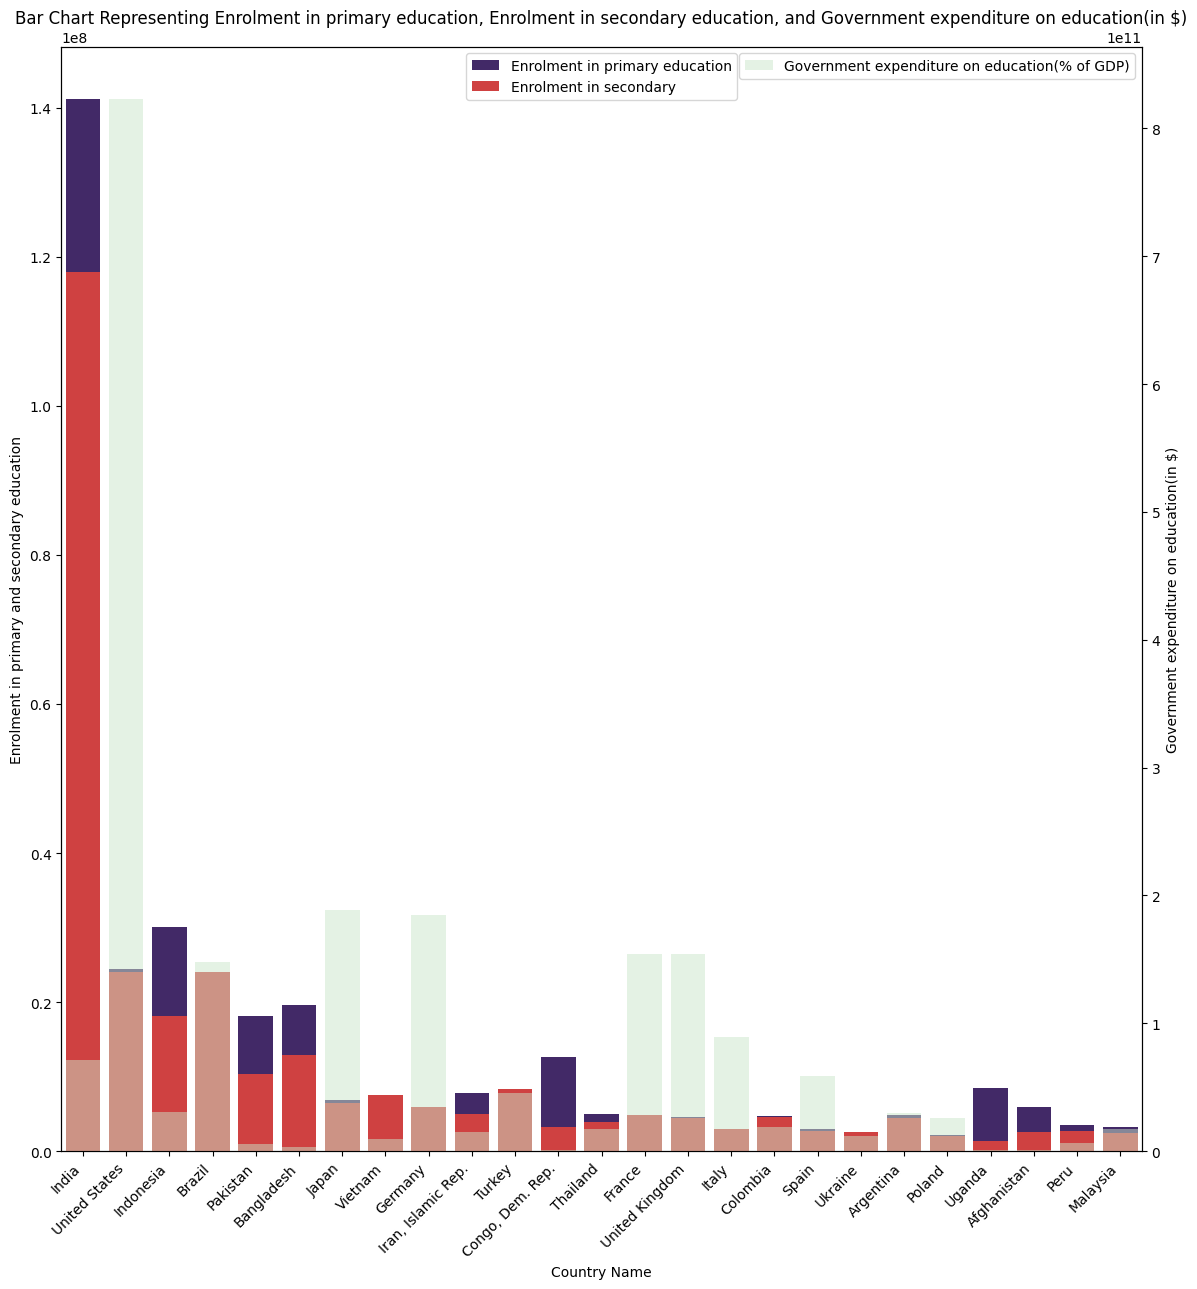

In [ ]:
# Chart - 4 visualization code
country_final_df_top20_chart3 = country_final_df[['Country Name', 'Enrolment in primary education', 'Enrolment in secondary', 'Government expenditure on education']].dropna().head(25)

# Chart - 3 visualization code
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 13))

# Plot the first two bars for enrolment in primary and secondary education
sns.barplot(x='Country Name', y='Enrolment in primary education', data=country_final_df_top20_chart3, color='#401F71', label='Enrolment in primary education', ax=ax1)
sns.barplot(x='Country Name', y='Enrolment in secondary', data=country_final_df_top20_chart3, color='#E72929', label='Enrolment in secondary', ax=ax1)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the third bar for per capita income
sns.barplot(x='Country Name', y='Government expenditure on education', data=country_final_df_top20_chart3, color='#C6EBC5', label='Government expenditure on education(% of GDP)', ax=ax2, alpha=0.5)

# Add legend for the third bar
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')


# Set labels and titles for both y-axes
ax1.set_ylabel('Enrolment in primary and secondary education')
ax2.set_ylabel('Government expenditure on education(in $)')
plt.xlabel('Country')
plt.title('Bar Chart Representing Enrolment in primary education, Enrolment in secondary education, and Government expenditure on education(in $)')


# Adjust the rotation angle and alignment of x-axis labels
ax1.set_xticklabels(country_final_df_top20_chart3['Country Name'], rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are commonly used to compare values across different categories or groups. They are particularly useful for displaying discrete data and identifying patterns or trends within the data.

In the above chart, I wanted to display the dropout rate while transitioning from primary education and secondary education. Also, I wanted to know the possible reason behind the problem so I utilized this chart.

##### 2. What is/are the insight(s) found from the chart?

In the above chart, the dropout rate during the transition from primary to secondary education is clearly visible, and one of the prominent possible reasons is the difference in education expenditure between countries. We can also observe that the United States alone spends more than the rest of the countries combined, but it's worth noting that China is not included in the chart due to a lack of available data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can observe various patterns among different countries, with some achieving significant results despite lower education expenditure. However, overall analysis suggests that countries need to allocate a certain amount of funds to reduce dropout rates effectively. While the correlation between education expenditure and dropout rates is evident, other factors such as educational policies, socio-economic conditions, and cultural influences may also play significant roles in determining dropout rates.

#### Chart - 5

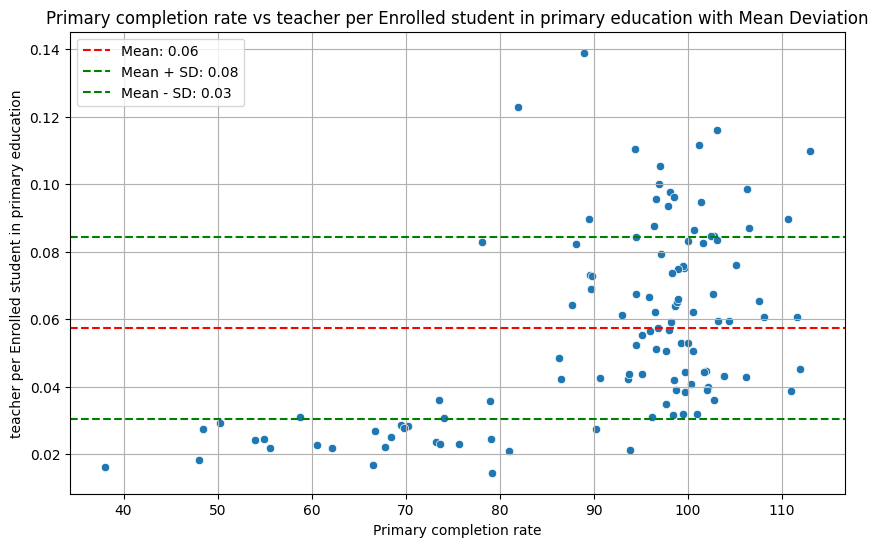

In [ ]:
# Chart - 5 visualization code

# Calculate mean and standard deviation
mean_value = country_final_df['teacher per Enrolled student in primary education'].mean()
std_dev = country_final_df['teacher per Enrolled student in primary education'].std()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary completion rate', y='teacher per Enrolled student in primary education', data=country_final_df)

# Plot the mean deviation line
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=mean_value + std_dev, color='g', linestyle='--', label=f'Mean + SD: {mean_value + std_dev:.2f}')
plt.axhline(y=mean_value - std_dev, color='g', linestyle='--', label=f'Mean - SD: {mean_value - std_dev:.2f}')

# Labels and titles
plt.title('Primary completion rate vs teacher per Enrolled student in primary education with Mean Deviation')
plt.xlabel('Primary completion rate')
plt.ylabel('teacher per Enrolled student in primary education')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is used to visualize the relationship between two variables. It displays data points as individual markers on a two-dimensional plane, with one variable plotted on the x-axis and the other on the y-axis. Scatter plots are useful for identifying patterns, trends, correlations, and outliers in the data.

In the above graph I wanted to show the relationship between the number of teachers per enrolled student and primary completion rate of various countries so i selected the scatter plot which was most suitable for the job.

##### 2. What is/are the insight(s) found from the chart?

From the graph it is clearly visible that the increase in teachers recruitment will be a big boost to the primary education completion rate of the country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Schools need to have enough teachers for the country to develop.
The pause in teachers recruitment will hamper the quality of future generations.

#### Chart - 6

Note:
* Gender Parity Index (GPI) : The Gender Parity Index (GPI) indicates parity between girls and boys. A GPI of less than 1 suggests girls are more disadvantaged than boys in learning opportunities and a GPI of greater than 1 suggests the other way around.

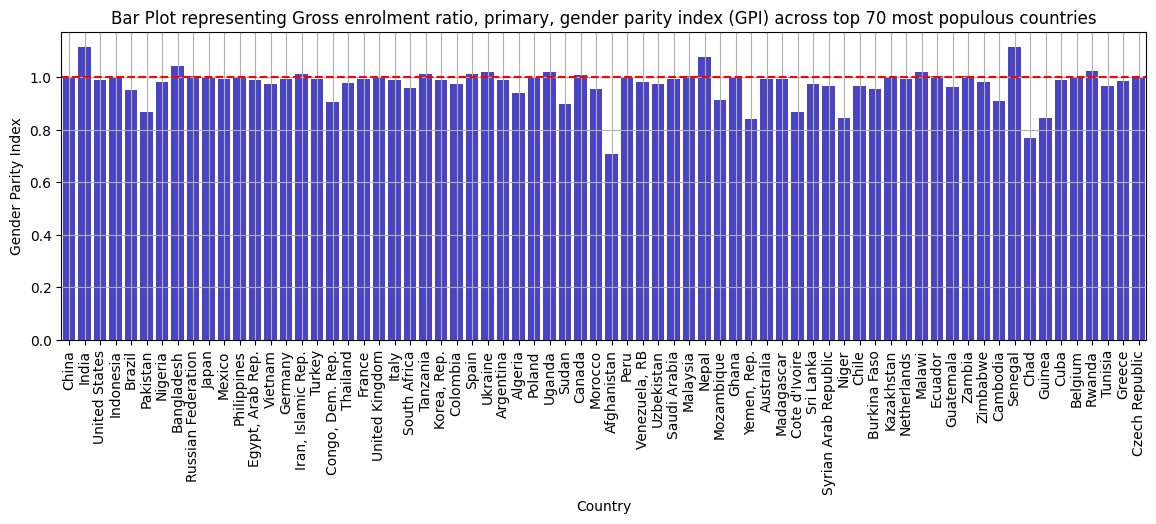

In [ ]:
# Chart - 6 visualization code
# Defination for GPI is mentioned above.

country_final_df_chart6 = country_final_df[['Country Name', 'Gross enrolment ratio, primary, gender parity index (GPI)']].dropna().head(70)

# Create bar plot
plt.figure(figsize=(14, 4))
sns.barplot(x=country_final_df_chart6['Country Name'], y=country_final_df_chart6['Gross enrolment ratio, primary, gender parity index (GPI)'], color='#362FD9')

sns.color_palette("hls", 8)

# Add reference line at y=1
plt.axhline(y=1, color='red', linestyle='--')

# Labels and title
plt.xlabel('Country')
plt.ylabel('Gender Parity Index')
plt.title('Bar Plot representing Gross enrolment ratio, primary, gender parity index (GPI) across top 70 most populous countries')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

In the above plot I have shown gender parity in enrollment to primary education for top 50 most populous countries arround the world. Gender parity above 1 indicate more female than male and vice versa. So, bar plot with horizontal line representing the standard value 1 is the most suited plot

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can acertain that in the aspect of gender parity in enrollment to primary education most of the countries are doing good with few leading and few lagging behind. India is the leader in this aspect closely followed by Senegal. Afghanistan is having the lowest GPI followed by Chad.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Countries with lower GPI must work on it to bring more girls to schools for the country to develop.
Lower participation of women in formal education will lead to disasterous results as the country will never achieve better literacy rate and part of their major population will remain illiterate for ages to come.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
country_final_df_chart7 = country_final_df[['Country Name', 'Primary completion rate']].dropna().head(70) # you can vary dataframe size by changing value in head

# Create bar plot
plt.figure(figsize=(14, 4))
sns.barplot(x=country_final_df_chart7['Country Name'], y=country_final_df_chart7['Primary completion rate'], color='#362FD9')

# Add reference line at y=1
plt.axhline(y=final_df['Primary completion rate'].mean(), color='red', linestyle='--')
plt.text(-6, final_df['Primary completion rate'].mean(), 'World Mean', color='red', fontsize=10)

# Labels and title
plt.xlabel('Country')
plt.ylabel('Gender Parity Index')
plt.title('Bar Plot representing Primary completion rate across 70 most populous countries')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I want to view where the different countries stand in terms of primary completion rate when compared with mean of primary completion rate arround the world. This plot pretty well represented the required data.

##### 2. What is/are the insight(s) found from the chart?

From the above plot it is clearly visible that countries are on either side of the line with ecuador toping the chart followed by ukraine. With Chad being the worst performer followed by Niger.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that few countries have performed very poor and need some hand holding from the fellow nation to develop over world as a whole.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# Calculate mean and standard deviation
mean_value_chart8 = country_final_df['Government expenditure on education per person'].mean()
std_dev_chart8 = country_final_df['Government expenditure on education per person'].std()

# Plot the scatter plot
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Unemployment percentage', y='Government expenditure on education per person', data=country_final_df)

# Plot the mean deviation line
plt.axhline(y=mean_value_chart8, color='r', linestyle='--', label=f'Mean: {mean_value_chart8:.2f}')
plt.axhline(y=mean_value_chart8 + std_dev_chart8, color='g', linestyle='--', label=f'Mean + SD: {mean_value_chart8 + std_dev_chart8:.2f}')
plt.axhline(y=mean_value_chart8 - std_dev_chart8, color='g', linestyle='--', label=f'Mean - SD: {mean_value_chart8 - std_dev_chart8:.2f}')

# Labels and titles
plt.title('Unemployment percentage vs Government expenditure on education per person with Mean Deviation')
plt.xlabel('Unemployment percentage')
plt.ylabel('Government expenditure on education per person')

# Set lower and upper limits for the x-axis
plt.ylim(0, 31000)

plt.legend(loc='upper right')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

In the above plot I wanted to display if the government expenditure on education per person will effect the unemployment percentage. I choose scatter plot which was most suitable for the plot

##### 2. What is/are the insight(s) found from the chart?

Any way from the above chart we can ascertain that the higher spenders have got lesser unemployment. But, on the other hand we can also see that few of the low spenders also have got lower unemployment percentage which is tough to answer.

##### 3. Will the gained insights help creating a positive business impact?

In an overall perspective with few exceptions it is showing the inverse relation between the education spending and unemployment percentage.

#### Chart - 9

<ipython-input-70-1ae64be4046c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels
<ipython-input-70-1ae64be4046c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels
<ipython-input-70-1ae64be4046c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels


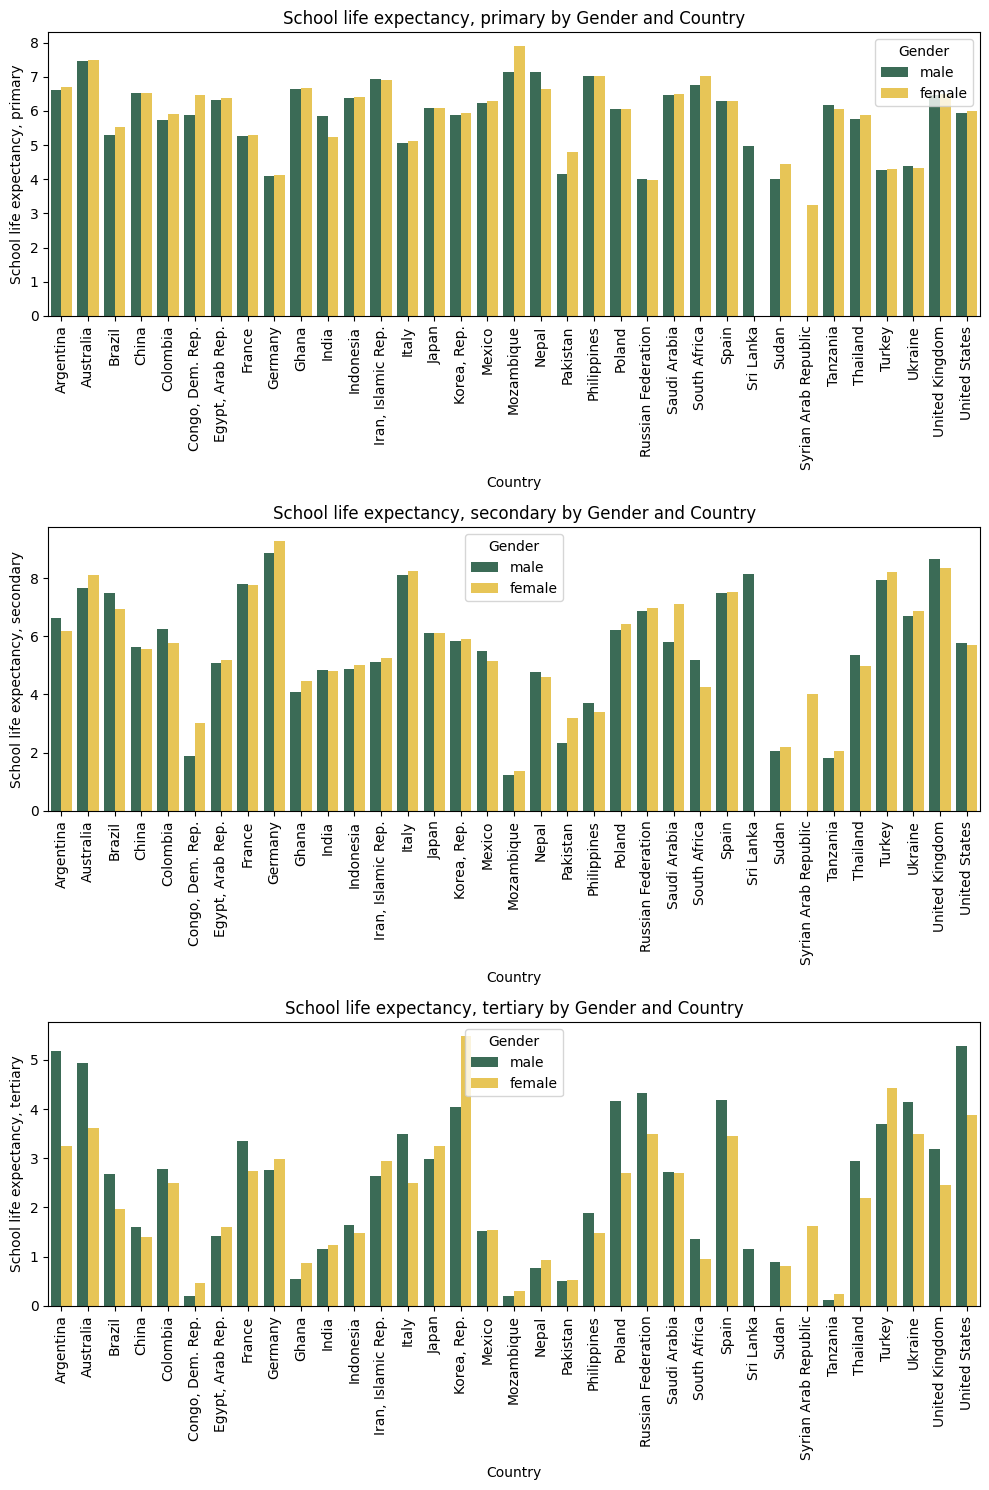

In [ ]:
filtered_country_gender_df = country_gender_df[country_gender_df['Adult illiterate population, 15+ years'] > 10000000]

# Define the columns for each subplot
columns = ['School life expectancy, primary', 'School life expectancy, secondary', 'School life expectancy, tertiary']

#color column
color = ['#337357', '#FFD23F']

# Create subplots with 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot each column in a separate subplot
for i, col in enumerate(columns):
    sns.barplot(x='Country Name', y=col, hue='Gender', data=filtered_country_gender_df, ax=axes[i], palette = color)
    axes[i].set_title(f'{col} by Gender and Country')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot with gender as a hue is the best plot to visualize the data above. Since I wanted to compare the school life expectancy across three stages of education and the gender gap in each stage simultaneously, I represented all three graphs in the same layout.

##### 2. What is/are the insight(s) found from the chart?

When it comes to gender gap, in primary there is no much visible gap but as the student move in to upper levels of education we can see that school life expectancy of male students increases living behind their female counterparts except in few cases where it is reverse.

Overall, school life expectancy tends to decrease as students progress from lower levels of education to higher ones. In some countries, particularly those with lower economic indicators, school life expectancy is notably lower compared to countries with higher economic status.

In tertiary education most of the countries show significant gender gap where male population enjoy more school life expectancy than female population. It is also seen in much of the developed countries too.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see, the world has achieved a significant milestone in providing primary education to a large portion of its population. However, there remains a considerable challenge in extending access to secondary and tertiary education. This is crucial to ensure that all individuals have the opportunity to benefit from the rapid technological advancements occurring globally and to foster holistic development worldwide.

#### Chart - 10

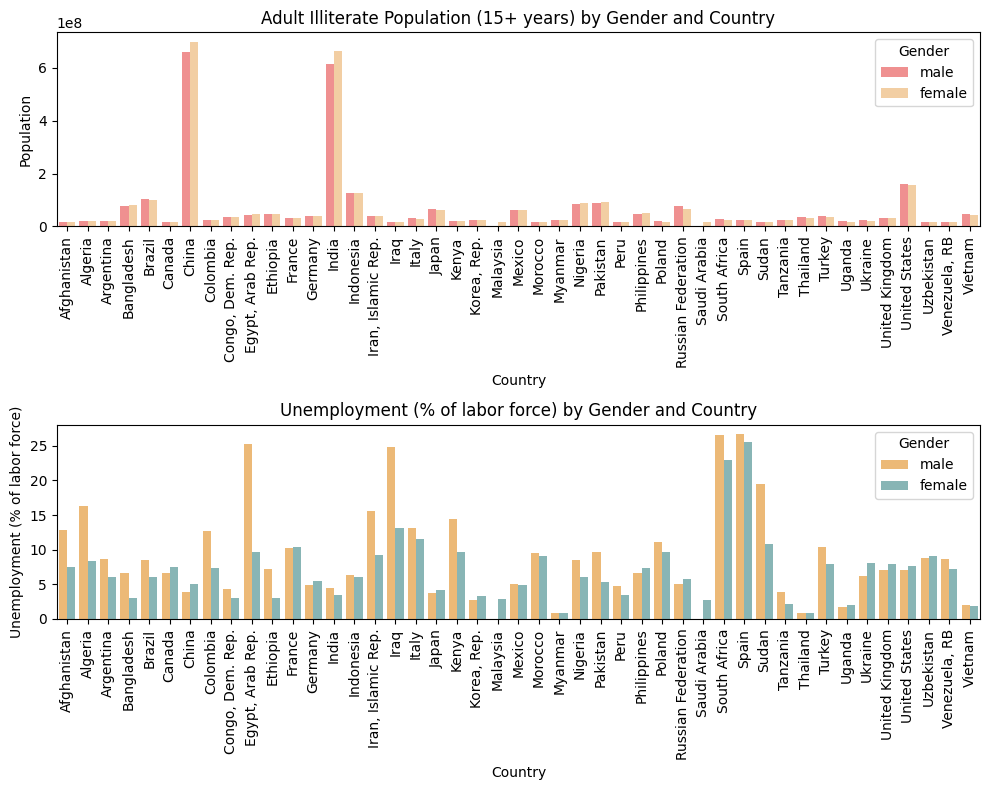

In [ ]:
# Chart - 10 visualization code
filtered_country_gender_employment_df = country_gender_employment_df[country_gender_employment_df['Adult illiterate population, 15+ years'] > 15000000]

# color pallette
color1 = ['#FF8080', '#FFCF96']
color2 = ['#FFBB64', '#80BCBD']

# Plot the bar plot
plt.figure(figsize=(10, 8))

# Bar plot for the first column
plt.subplot(2, 1, 1)
sns.barplot(x='Country Name', y='Adult illiterate population, 15+ years', hue='Gender', data=filtered_country_gender_employment_df, palette = color1)
plt.title('Adult Illiterate Population (15+ years) by Gender and Country')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend(title='Gender')

# Bar plot for the second column
plt.subplot(2, 1, 2)
sns.barplot(x='Country Name', y='Unemployment (% of labor force)', hue='Gender', data=filtered_country_gender_employment_df, palette = color2)
plt.title('Unemployment (% of labor force) by Gender and Country')
plt.xlabel('Country')
plt.ylabel('Unemployment (% of labor force)')
plt.xticks(rotation=90)
plt.legend(title='Gender')

# Adjust layout
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot with gender as a hue is the best plot to visualize the data above. Since I wanted to compare gender gap in literacy to gender gap in employment across the world simultaneously, I represented both the graphs in same layout.

##### 2. What is/are the insight(s) found from the chart?

In the first graph, we can observe that there is not much difference between male and female illiteracy. However, there are a few exceptions where the female illiteracy is slightly higher than the male illiteracy.

In the second plot, focusing on the unemployment rate (% of the labor force), which measures the proportion of unemployed individuals actively seeking employment, we notice a stark contrast between genders. Apart from developed countries where the rates are similar for both genders, there is a significant difference in unemployment rates between males and females. In most cases, the unemployment rate is higher for males compared to females. However, it's essential to note that this metric only considers individuals actively seeking employment, which may not fully capture the overall gender gap in unemployment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Across the globe, among those actively seeking employment, the male population tends to face higher rates of unemployment compared to females, with few exceptions in developed countries. In contrast, literacy rates between genders are relatively similar in most countries.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 9))

# Plot the first bar chart
ax1.barh(country_group_final_df['Country Name'], country_group_final_df['Unemployment percentage'], color='#FF204E', label='Unemployment Percentage')
ax1.set_xlabel('Unemployment Percentage')
ax1.set_title('Unemployment Percentage and GDP Across Different Country Groups')
ax1.set_ylabel('Country Groups')

# Create a secondary y-axis
ax2 = ax1.twiny()

# Plot the second bar chart on the secondary y-axis
ax2.barh(country_group_final_df['Country Name'], country_group_final_df['GDP per capita($)'], color='#00DCFFB7', label='GDP per capita($)')
ax2.set_xlabel('GDP per capita($)')
ax2.xaxis.tick_top()  # Move the secondary x-axis ticks to the top
ax2.xaxis.set_label_position('top')

# Invert y-axis to have the highest income group at the top
ax1.invert_yaxis()

# Add legend
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

plt.show()



##### 1. Why did you pick the specific chart?

Horizontal bar plots are most useful when you have categories with lengthy names. They make it easier to read the y-labels and represent large amounts of data in a single view. Overlapping another dataset onto it helps in comparing data.

Here I have used this plot to compare two different datas of all country groups simultaneously.

##### 2. What is/are the insight(s) found from the chart?

In the above data, we can observe that some countries, despite having low per capita income, exhibit strong employment rates. Conversely, certain countries with higher GDP per capita experience higher levels of unemployment than poorer nations. This discrepancy may be attributed to factors such as unemployment benefits, universal basic income, and other social welfare programs provided by those countries to their citizens.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Middle Eastern, North African, and Arab countries exhibit the highest unemployment percentages, while South Asia and East Asia Pacific regions have the lowest unemployment rates.

#### Chart - 12

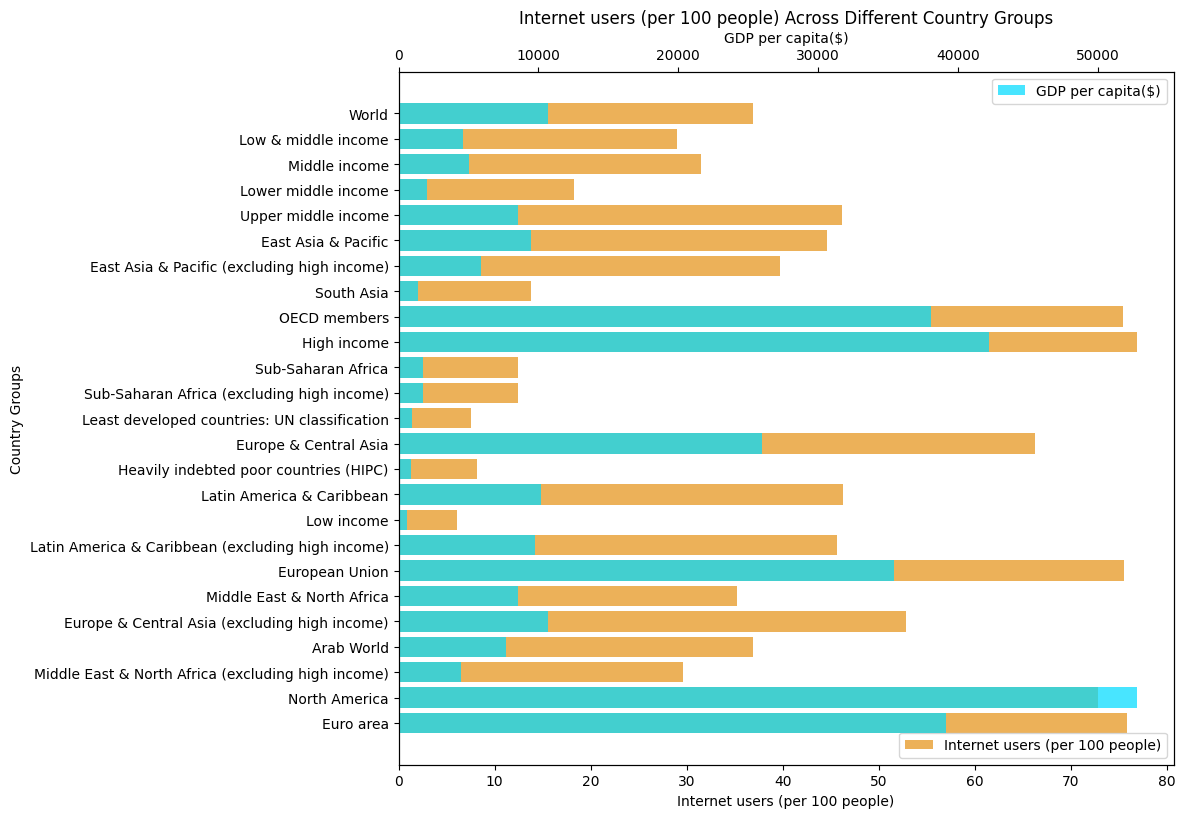

In [ ]:
# Chart - 12 visualization code
fig, ax1 = plt.subplots(figsize=(10, 9))

# Create horizontal bar plot
ax1.barh(country_group_final_df['Country Name'], country_group_final_df['Internet users (per 100 people)'], color='#ECB159', label='Internet users (per 100 people)')
ax1.set_xlabel('Internet users (per 100 people)')
ax1.set_title('Internet users (per 100 people) Across Different Country Groups')
ax1.set_ylabel('Country Groups')

# Create a secondary y-axis
ax2 = ax1.twiny()

# Plot the second bar chart on the secondary y-axis
ax2.barh(country_group_final_df['Country Name'], country_group_final_df['GDP per capita($)'], color='#00DCFFB7', label='GDP per capita($)')
ax2.set_xlabel('GDP per capita($)')
ax2.xaxis.tick_top()  # Move the secondary x-axis ticks to the top
ax2.xaxis.set_label_position('top')

# Invert y-axis to have the highest income group at the top
ax1.invert_yaxis()

# Add legend
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

plt.show()


##### 1. Why did you pick the specific chart?

Horizontal bar plots are most useful when you have categories with lengthy names. They make it easier to read the y-labels and represent large amounts of data in a single view. Overlapping another dataset onto it helps in comparing data.

Here I have used this plot to compare two different datas of all country groups simultaneously.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is clearly visble that the internet usage per 100 people increases withe increase in GDP per capita of the country. Low income and heavily indebted poor countries have substantially low internet usage when compared to high and middle income countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Internet usage data serves as a vital indicator of literacy and development within a country. Access to the internet opens doors to a plethora of knowledge and innovations in today's rapidly evolving world. The level of internet penetration in a country is closely linked to its overall development. It is imperative for low-income countries to receive support and assistance to bridge the digital divide and enhance their connectivity. High-income countries can contribute by providing used devices and infrastructure to facilitate internet access in less developed regions. With technology making global connectivity more accessible, the collective progress of all nations is crucial for global development and unity.

#### Chart - 13

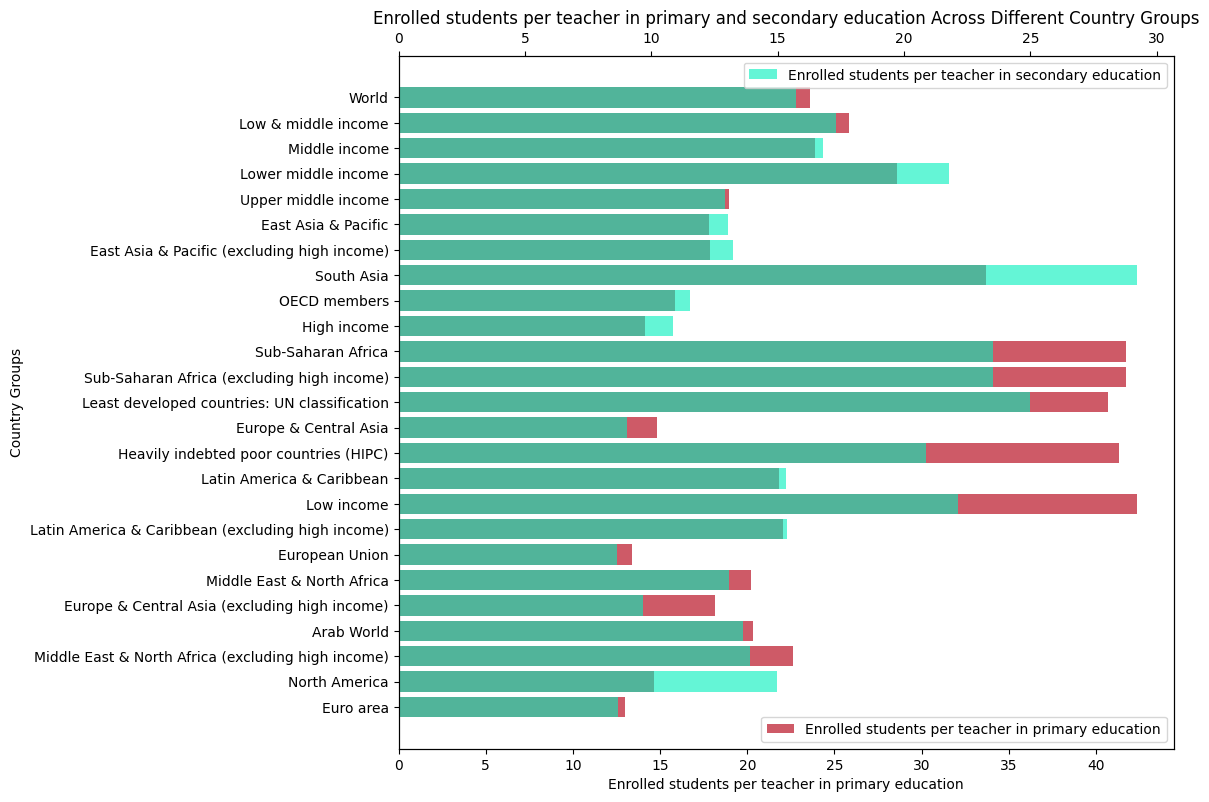

In [ ]:
# Chart - 13 visualization code
fig, ax1 = plt.subplots(figsize=(10, 9))

# Create horizontal bar plot
ax1.barh(country_group_final_df['Country Name'], country_group_final_df['Enrolled students per teacher in primary education'], color='#CE5A67', label='Enrolled students per teacher in primary education')
ax1.set_xlabel('Enrolled students per teacher in primary education')
ax1.set_title('Enrolled students per teacher in primary and secondary education Across Different Country Groups')
ax1.set_ylabel('Country Groups')

# Create a secondary y-axis
ax2 = ax1.twiny()

# Plot the second bar chart on the secondary y-axis #00EFBC9B #00F7418F #00C21292
ax2.barh(country_group_final_df['Country Name'], country_group_final_df['Enrolled students per teacher in secondary education'], color='#00EFBC9B', label='Enrolled students per teacher in secondary education')

# Invert y-axis to have the highest income group at the top
ax1.invert_yaxis()

# Add legend
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar plots are most useful when you have categories with lengthy names. They make it easier to read the y-labels and represent large amounts of data in a single view. Overlapping another dataset onto it helps in comparing data.

Here I have used this plot to compare two different datas of all country groups simultaneously.

##### 2. What is/are the insight(s) found from the chart?

The plot highlights a significant disparity in the number of teachers per enrolled student in secondary education between low-income and high-income countries. While high-income countries maintain sufficient teacher-student ratios in both primary and secondary education, low-income and indebted countries struggle with a shortage of teachers in both levels. This gap underscores the need for greater investment in education and teacher recruitment initiatives in less affluent regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A shortage of teachers in education poses significant challenges for low-income nations, potentially hindering their development efforts. It underscores the urgent need for these countries to prioritize education and invest in initiatives to recruit and retain qualified teachers, as education plays a crucial role in driving national development and socioeconomic progress.

#### Chart - 14

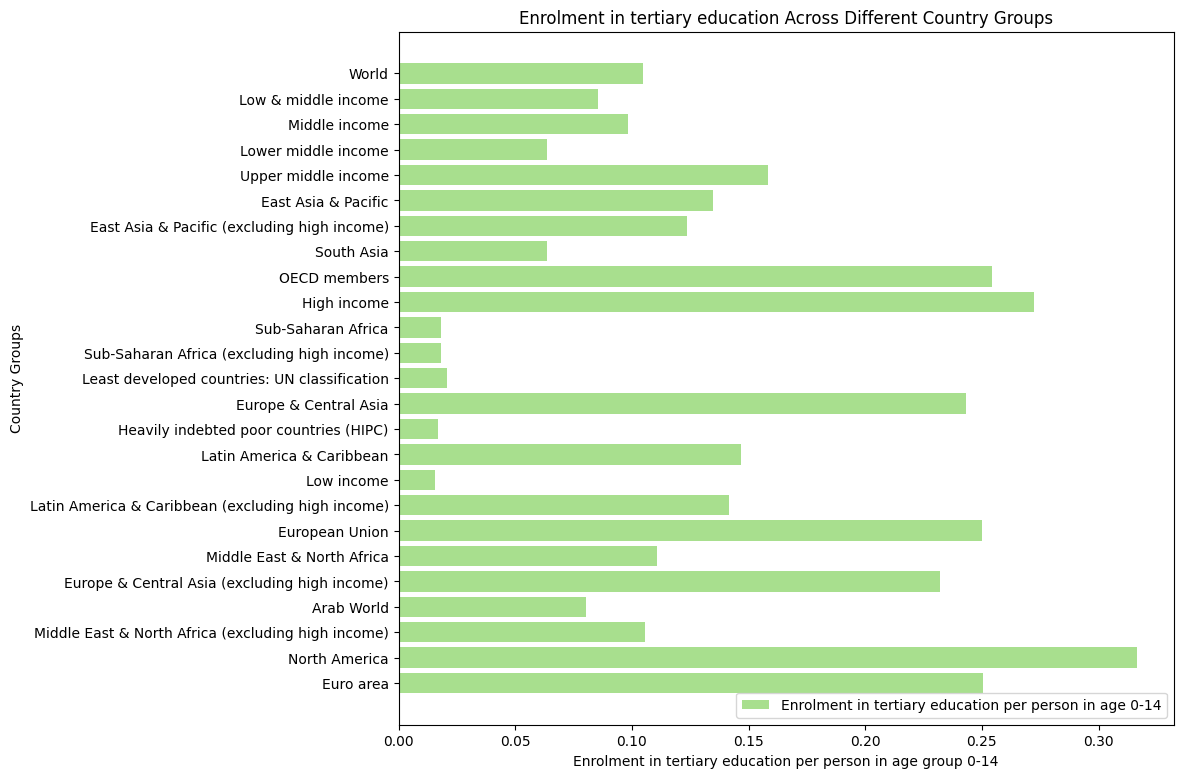

In [ ]:
# Chart - 14 visualization code
plt.figure(figsize=(10, 9))

# Create horizontal bar plot
plt.barh(country_group_final_df['Country Name'], country_group_final_df['Enrolment in tertiary education per person in age 0-14'], color='#A8DF8E', label='Enrolment in tertiary education per person in age 0-14')
plt.xlabel('Enrolment in tertiary education per person in age group 0-14')
plt.title('Enrolment in tertiary education Across Different Country Groups')
plt.ylabel('Country Groups')

# Invert y-axis to have the highest income group at the top
plt.gca().invert_yaxis()

# Add legend
plt.legend(loc='lower right')

plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar plots are most useful when you have categories with lengthy names. They make it easier to read the y-labels and represent large amounts of data in a single view.

##### 2. What is/are the insight(s) found from the chart?

In a previous visualization of the countries dataset, it was observed that several countries lagged behind in tertiary education. This plot illustrates that economic underdevelopment is a significant contributing factor. There is a stark contrast between low-income, heavily indebted, and least developed countries compared to high-income countries

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is evident from the data that improving the education standard of the country will suerly uplift country from poverty.

#### Chart - 15

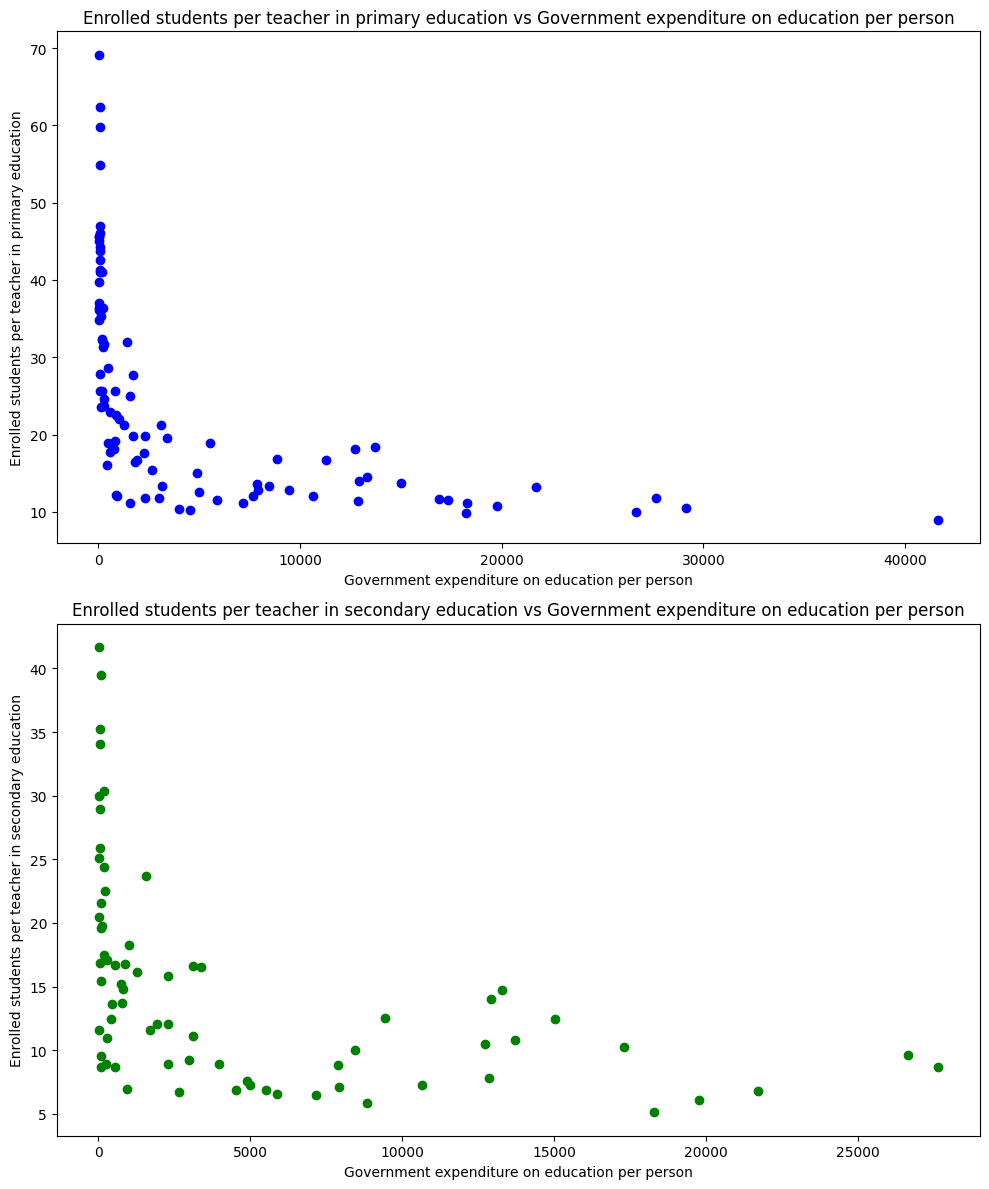

In [ ]:
# Chart - 15 visualization

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# First scatter plot
ax1.scatter(country_final_df['Government expenditure on education per person'],
            country_final_df['Enrolled students per teacher in primary education'],
            color='blue')
ax1.set_title('Enrolled students per teacher in primary education vs Government expenditure on education per person')
ax1.set_xlabel('Government expenditure on education per person')
ax1.set_ylabel('Enrolled students per teacher in primary education')

# Second scatter plot
ax2.scatter(country_final_df['Government expenditure on education per person'],
            country_final_df['Enrolled students per teacher in secondary education'],
            color='green')
ax2.set_title('Enrolled students per teacher in secondary education vs Government expenditure on education per person')
ax2.set_xlabel('Government expenditure on education per person')
ax2.set_ylabel('Enrolled students per teacher in secondary education')

# Adjust layout
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is used to visualize the relationship between two variables. It displays data points as individual markers on a two-dimensional plane, with one variable plotted on the x-axis and the other on the y-axis. Scatter plots are useful for identifying patterns, trends, correlations, and outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

The graph illustrates the correlation between government expenditure on education and the ratio of enrolled students per teacher in primary and secondary education. It demonstrates that even a slight increase in expenditure leads to a significant decrease in the number of students per teacher, indicating an improvement in the quality of education within the country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This graph vividly illustrates the substantial impact that even a slight increase in expenditure can have. A small uptick in funding can effectively address significant teacher shortages within the country, demonstrating the importance of investment in education.

#### Chart - 16

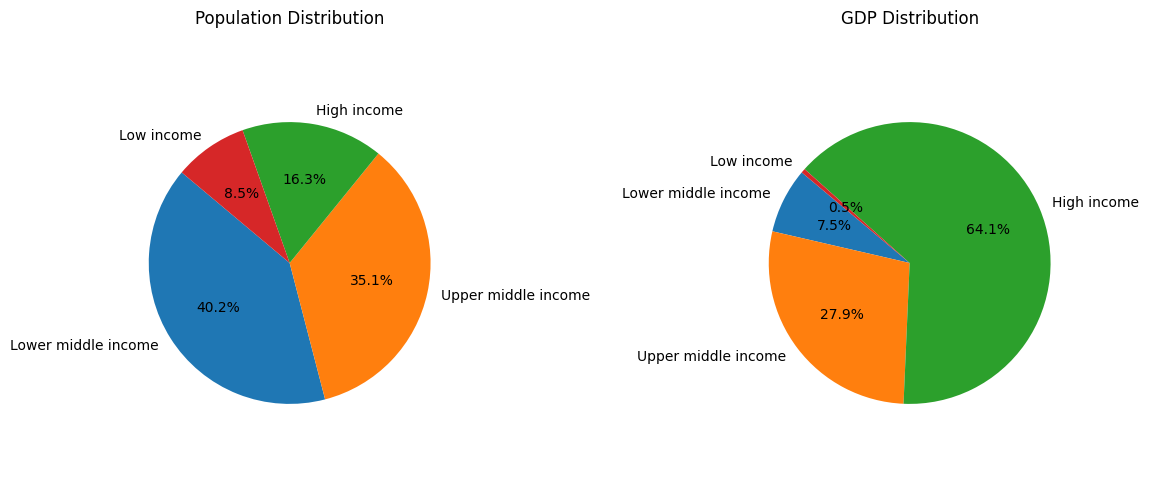

In [ ]:
# Chart - 16 visualization
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for population
axes[0].pie(country_group_final_income_level_df['population'], labels=country_group_final_income_level_df['Country Name'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Population Distribution')

# Plot for GDP
axes[1].pie(country_group_final_income_level_df['GDP at market prices (current US$)'], labels=country_group_final_income_level_df['Country Name'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('GDP Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[0].axis('equal')
axes[1].axis('equal')

plt.subplots_adjust(wspace=1)

plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is a type of graph in which a circle is divided into sectors that each represents a proportion of the whole. Pie charts are a useful way to organize data in order to see the size of components relative to the whole, and are particularly good at showing percentage or proportional data.

This is the best suited graph to display following data

##### 2. What is/are the insight(s) found from the chart?

The graph on the left categorizes the world population into various income levels, while the graph on the right illustrates the distribution of GDP among these income levels. Notably, the top 16.3% of the high-income population accounts for a significant 64.1% of the world GDP. In contrast, the bottom 48.7% of low and lower-middle-income countries collectively represent only 8% of the global GDP.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above plot display the inequality in income distribution arround the world.

#### Chart - 17

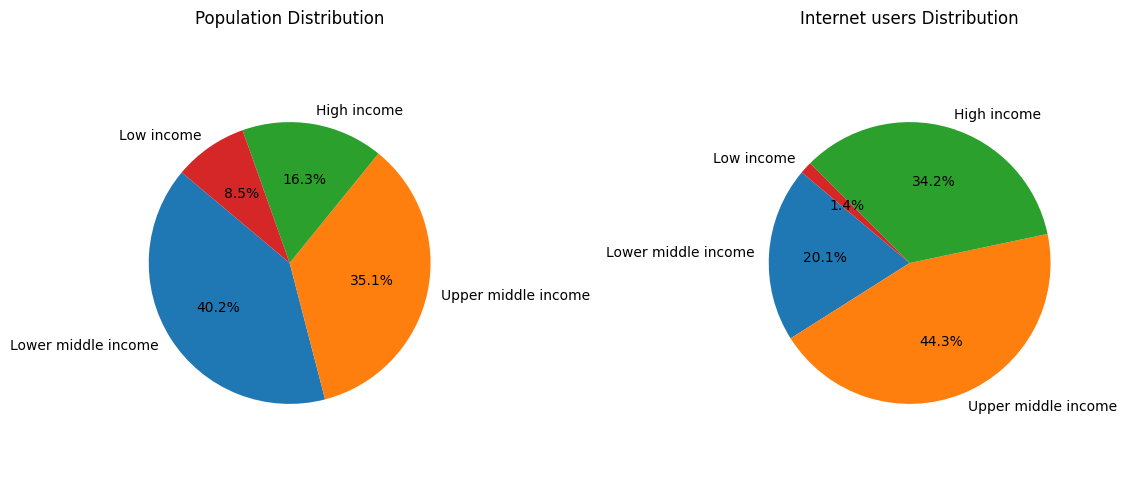

In [ ]:
# Chart - 17 visualization code
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for population
axes[0].pie(country_group_final_income_level_df['population'], labels=country_group_final_income_level_df['Country Name'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Population Distribution')

# Plot for GDP
axes[1].pie(country_group_final_income_level_df['Total internet users'], labels=country_group_final_income_level_df['Country Name'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Internet users Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[0].axis('equal')
axes[1].axis('equal')

plt.subplots_adjust(wspace=1)

plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is a type of graph in which a circle is divided into sectors that each represents a proportion of the whole. Pie charts are a useful way to organize data in order to see the size of components relative to the whole, and are particularly good at showing percentage or proportional data.

This is the best suited graph to display difference in population and internet user population among different income groups.

##### 2. What is/are the insight(s) found from the chart?

The left graph illustrates the distribution of the world population across different income groups, while the right graph depicts the distribution of internet users among these income groups. Notably, the top 16.3% of the high-income group constitutes 34.2% of global internet users, whereas the 48.7% of low and lower middle income nations account for only 21.5% of internet users worldwide.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Internet usage data serves as a crucial indicator of literacy and development within a country. Ensuring universal access to the internet is essential in today's world, as it can bring education to even the most remote corners of the globe. Therefore, efforts must be made to ensure that no country or individual is deprived of internet access.

#### Chart - 18

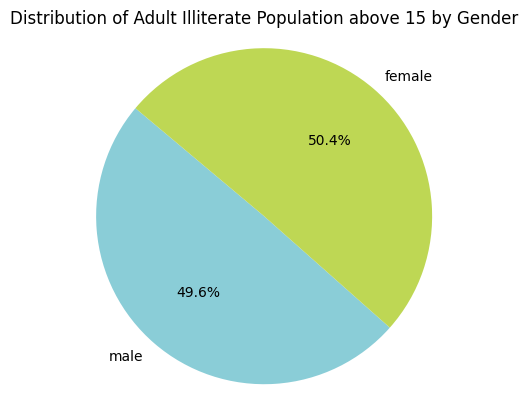

In [ ]:
# Chart - 18 visualization code
gender_employment_world_df = gender_employment_df[gender_employment_df['Country Name'] == 'World']


colors = ['#8ACDD7', '#BED754']

# Create a pie chart
plt.pie(gender_employment_world_df['Adult illiterate population, 15+ years'], labels=gender_employment_world_df['Gender'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Adult Illiterate Population above 15 by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is a type of graph in which a circle is divided into sectors that each represents a proportion of the whole. Pie charts are a useful way to organize data in order to see the size of components relative to the whole, and are particularly good at showing percentage or proportional data.

##### 2. What is/are the insight(s) found from the chart?

In the above plot, I wanted to examine the population difference between genders in the adult illiterate population around the world.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Didn't find much difference. but female are slightly on the upperhand.

#### Chart - 19 - Correlation Heatmap

Country Group Dataset

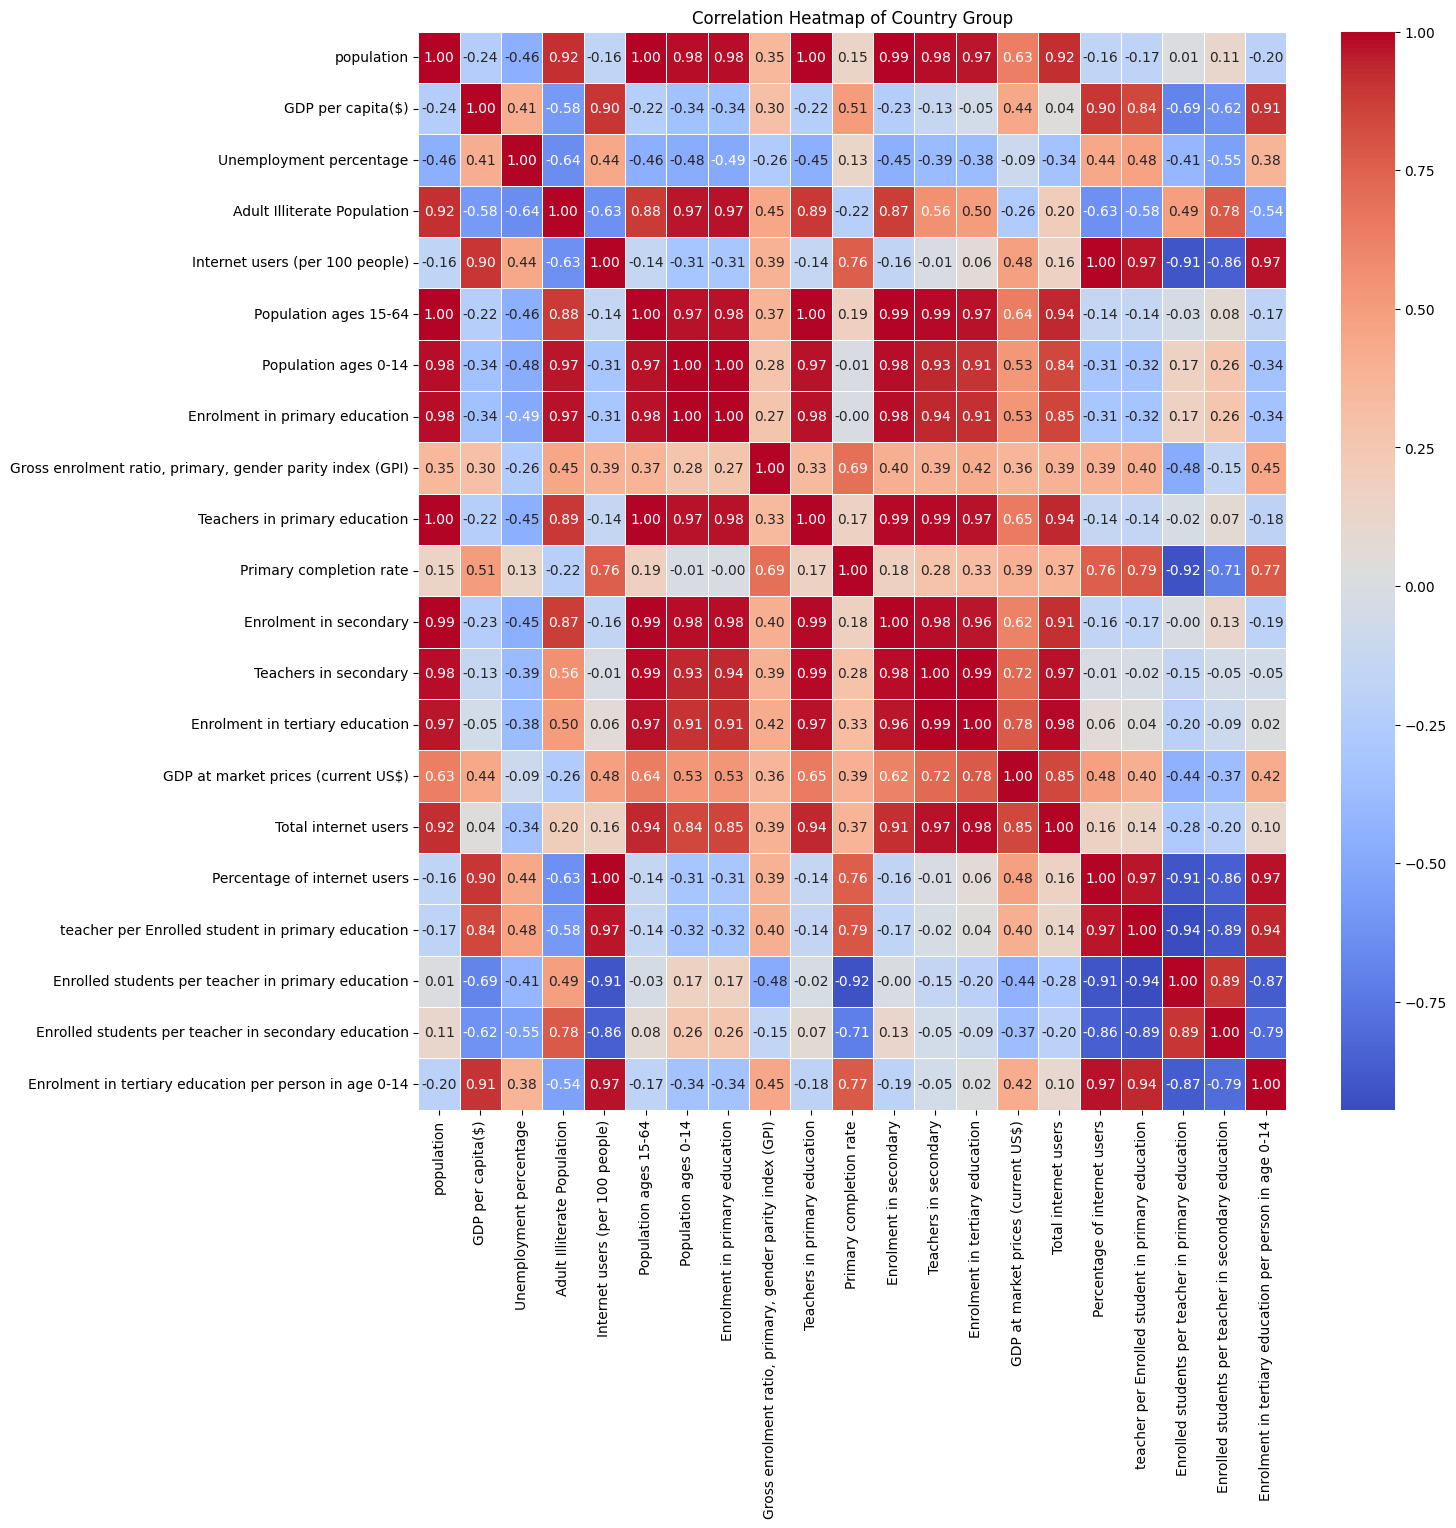

In [ ]:
# Correlation Heatmap visualization code
# Calculate correlation matrix
country_group_final_float_df = country_group_final_df.drop(columns=['Country Name']).dropna(axis=1, how='all')
corr_matrix_country_group = country_group_final_float_df.corr()

# Create a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix_country_group, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Country Group')
plt.show()

Country Dataset

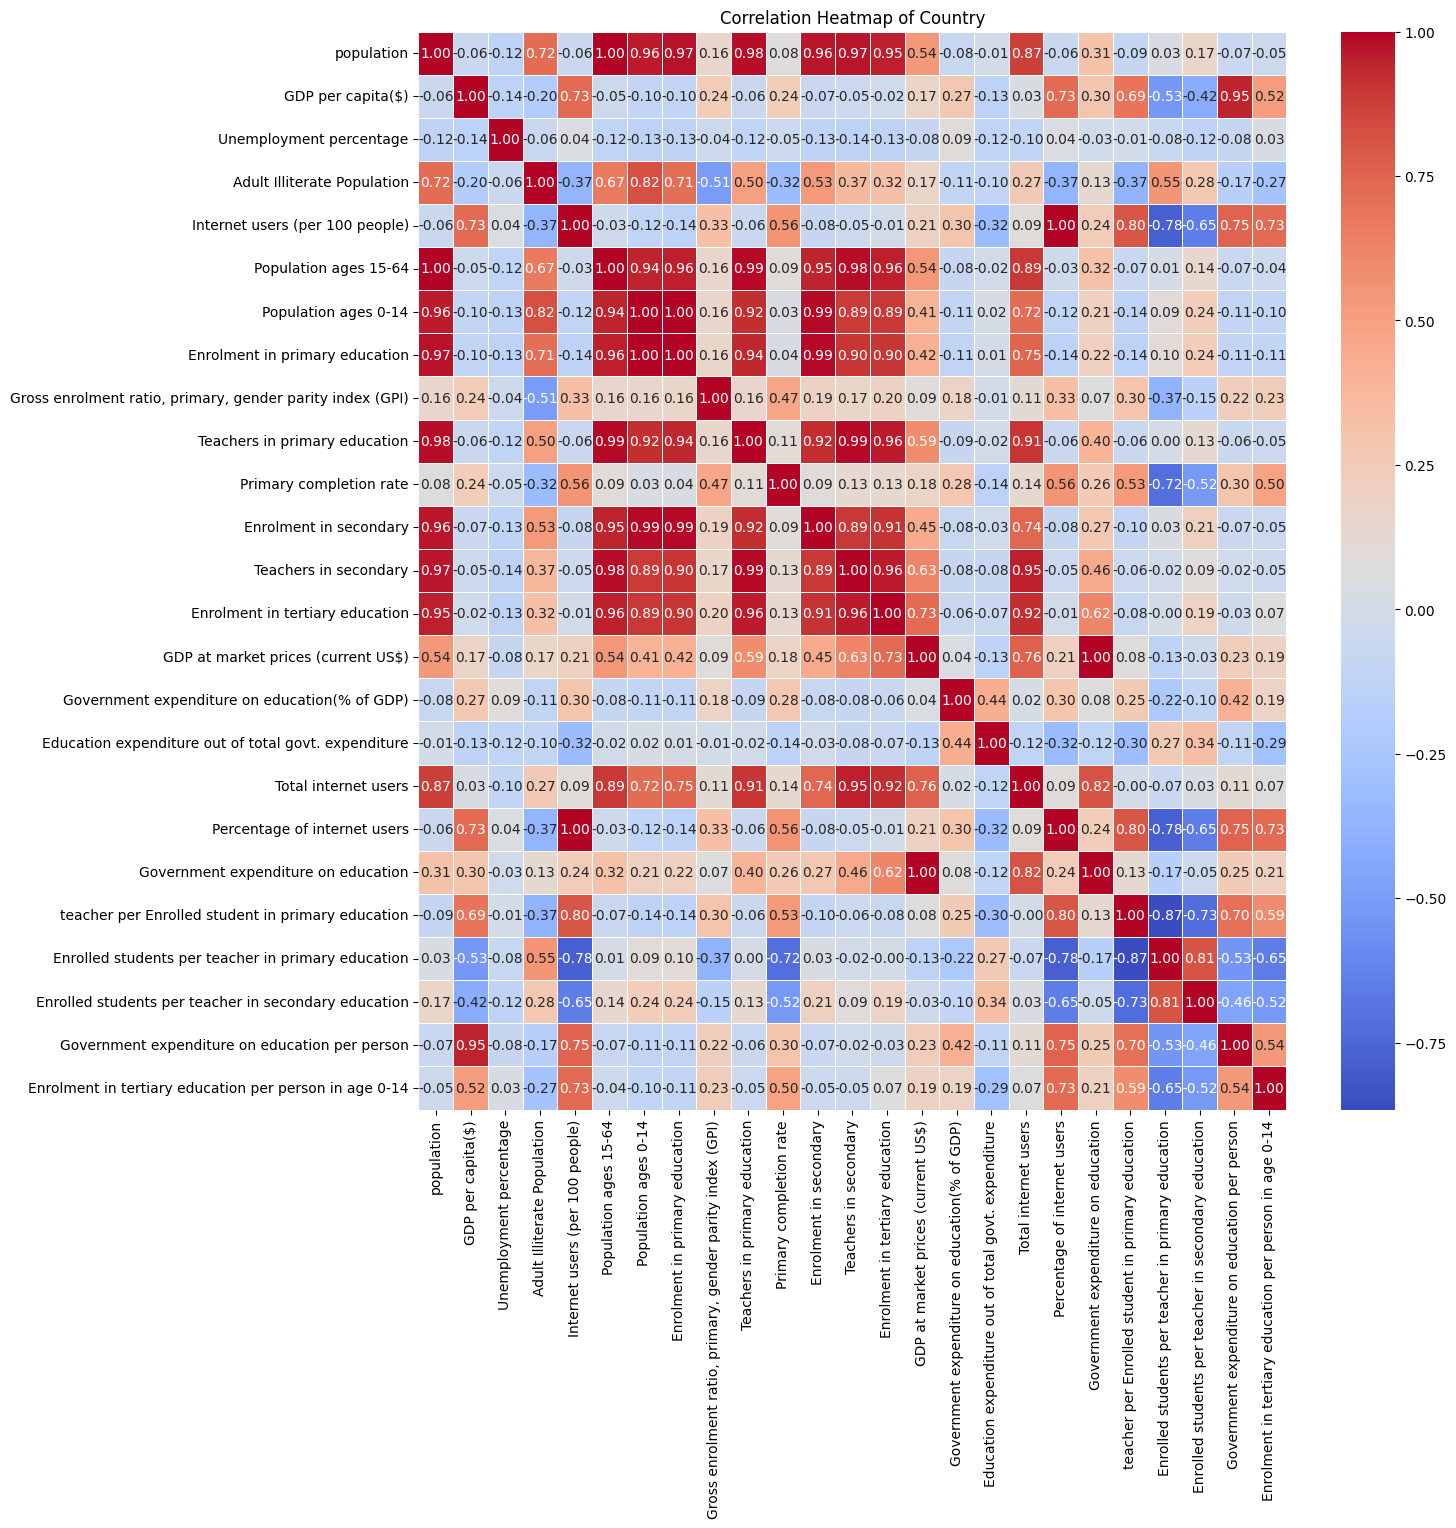

In [ ]:
# Correlation Heatmap visualization code
# Calculate correlation matrix
country_final_float_df = country_final_df.drop(columns=['Country Name']).dropna(axis=1, how='all')
country_final_float_df = country_final_float_df.rename(columns={'Government expenditure on education as % of total government expenditure': 'Education expenditure out of total govt. expenditure'})
corr_matrix_country = country_final_float_df.corr()

# Create a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix_country, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Country')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Correlation heatmap is on of the most important plot in order to instantly visualize the correlation between two variables if they are directly proportion the value will be positive if they are inversely proportional the value will be negative.

#### Chart - 20 - Pair Plot

Country group dataset

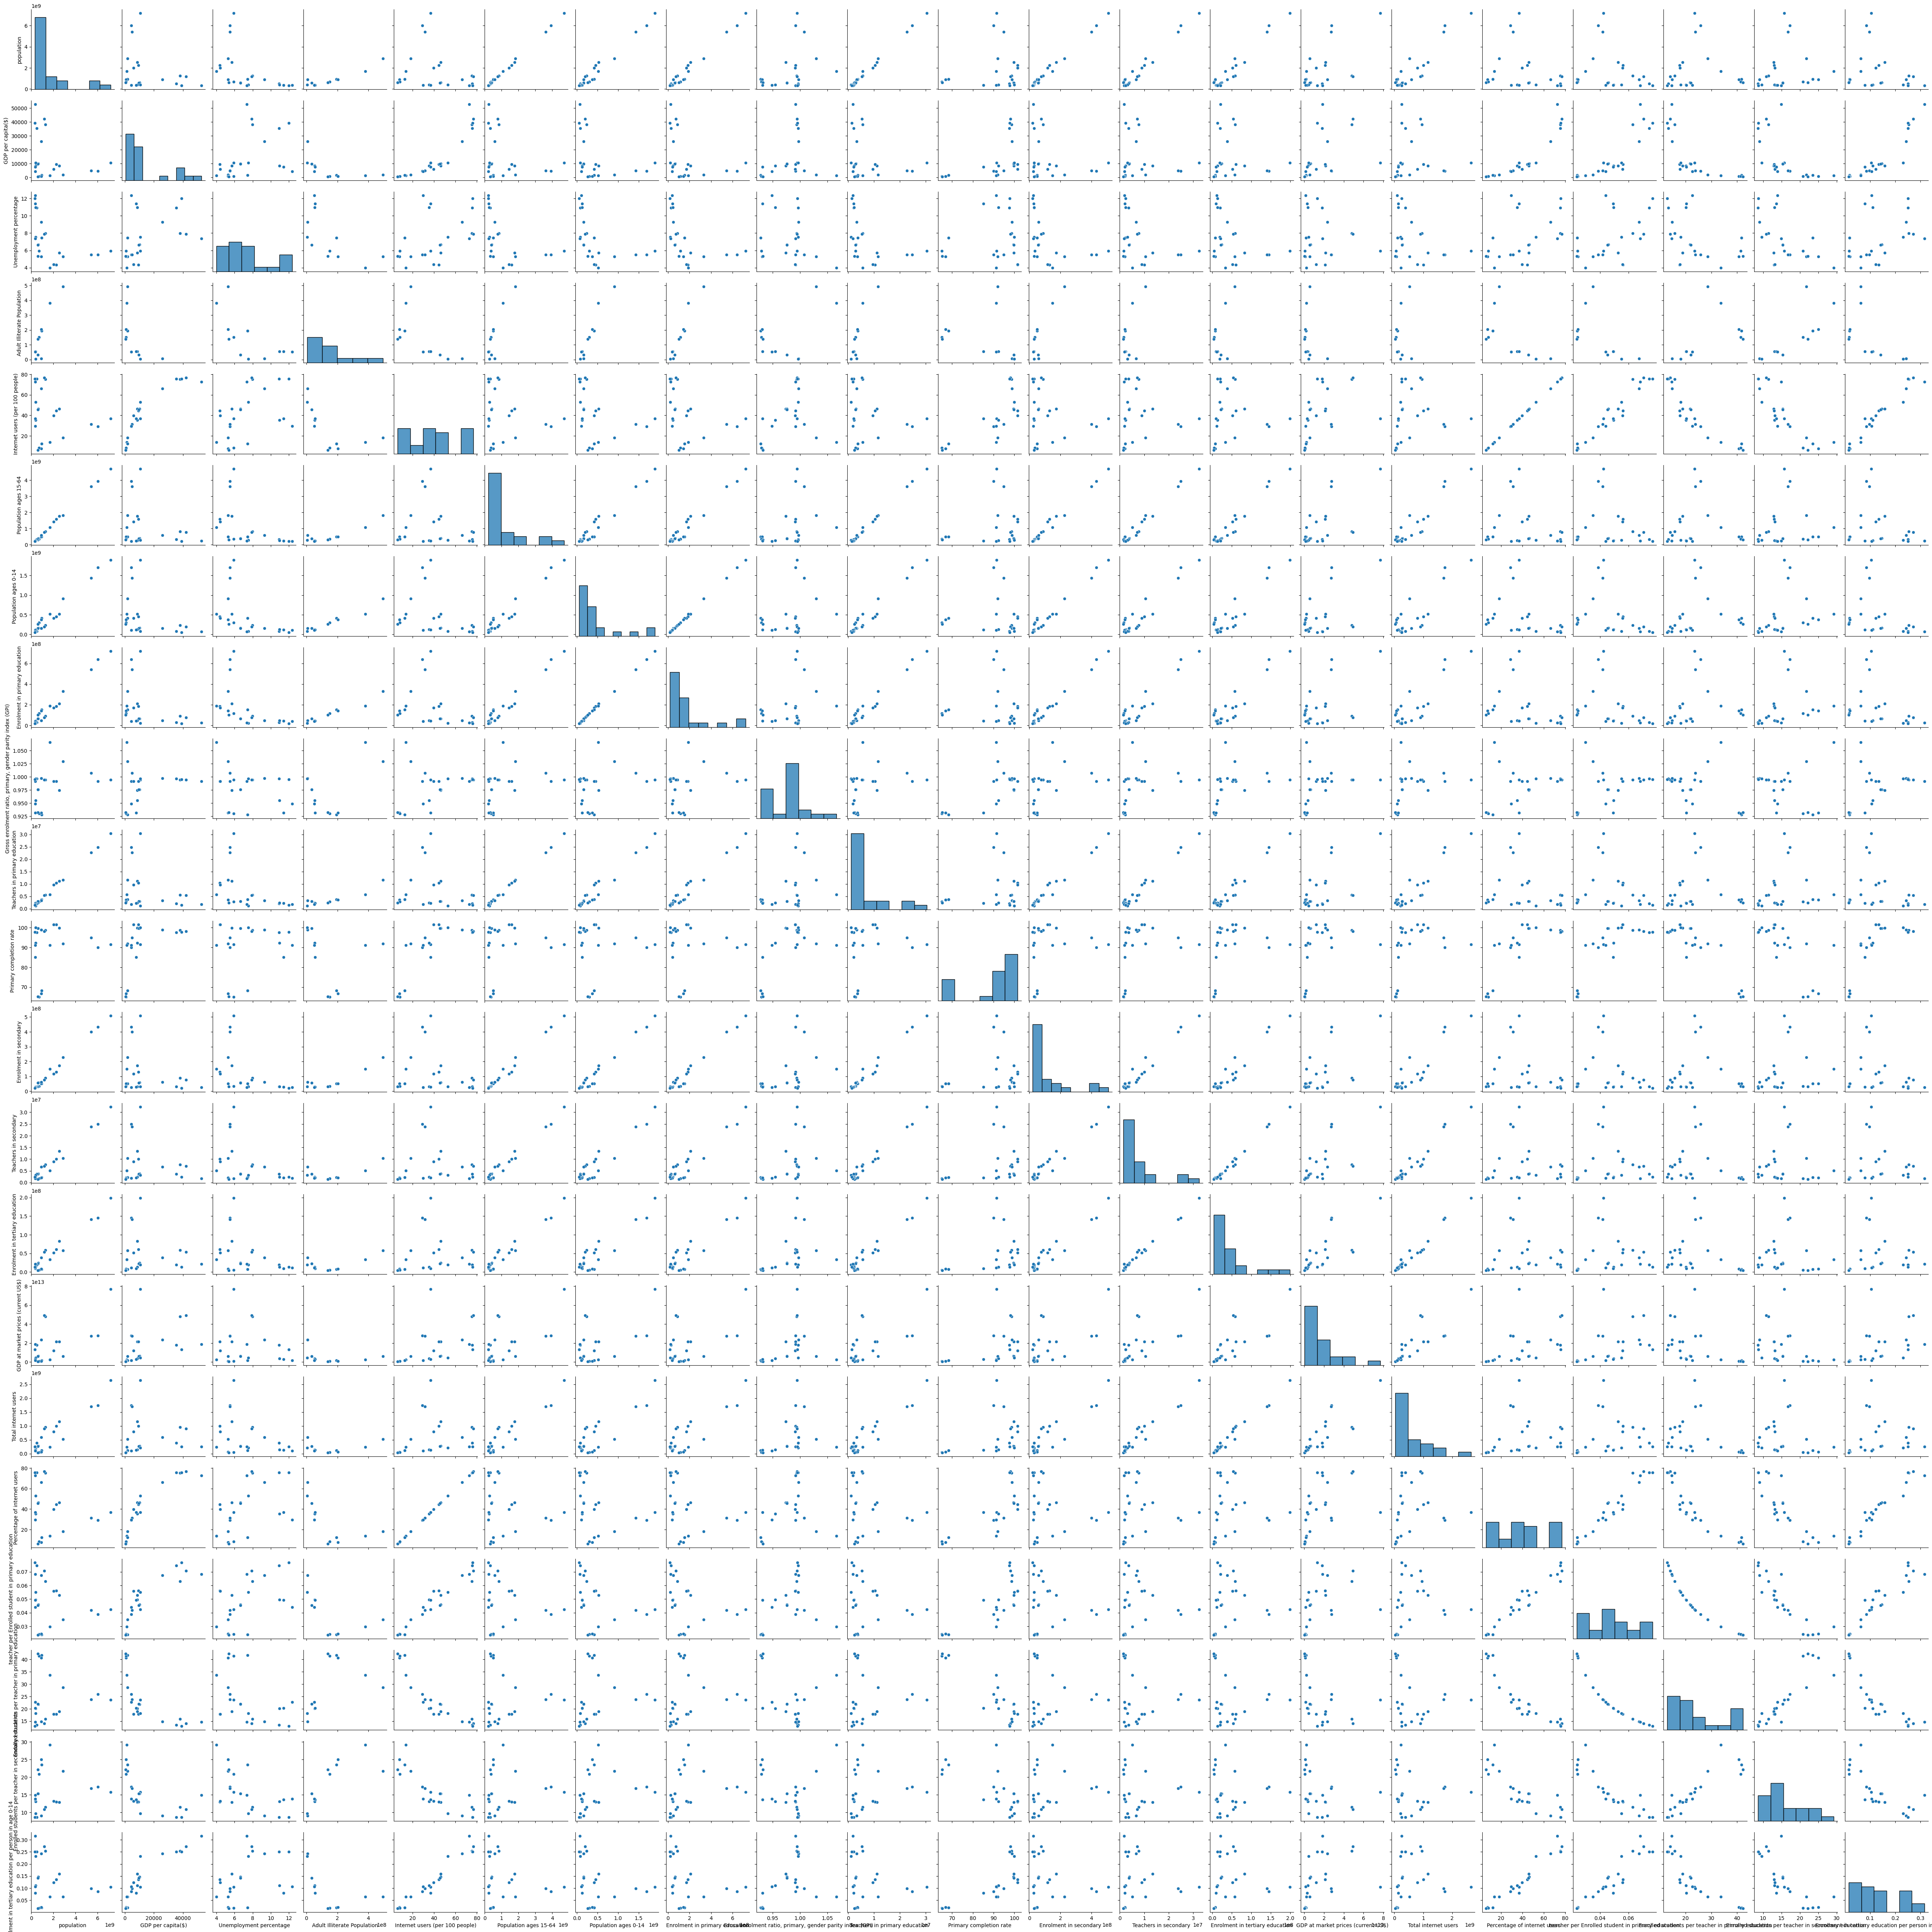

In [ ]:
# Pair Plot visualization code
country_group_final_numeric_df = country_group_final_df.drop(columns=['Country Name']).dropna(axis=1, how='all')

# Create pair plot
sns.pairplot(country_group_final_numeric_df)
plt.show()

Country dataset

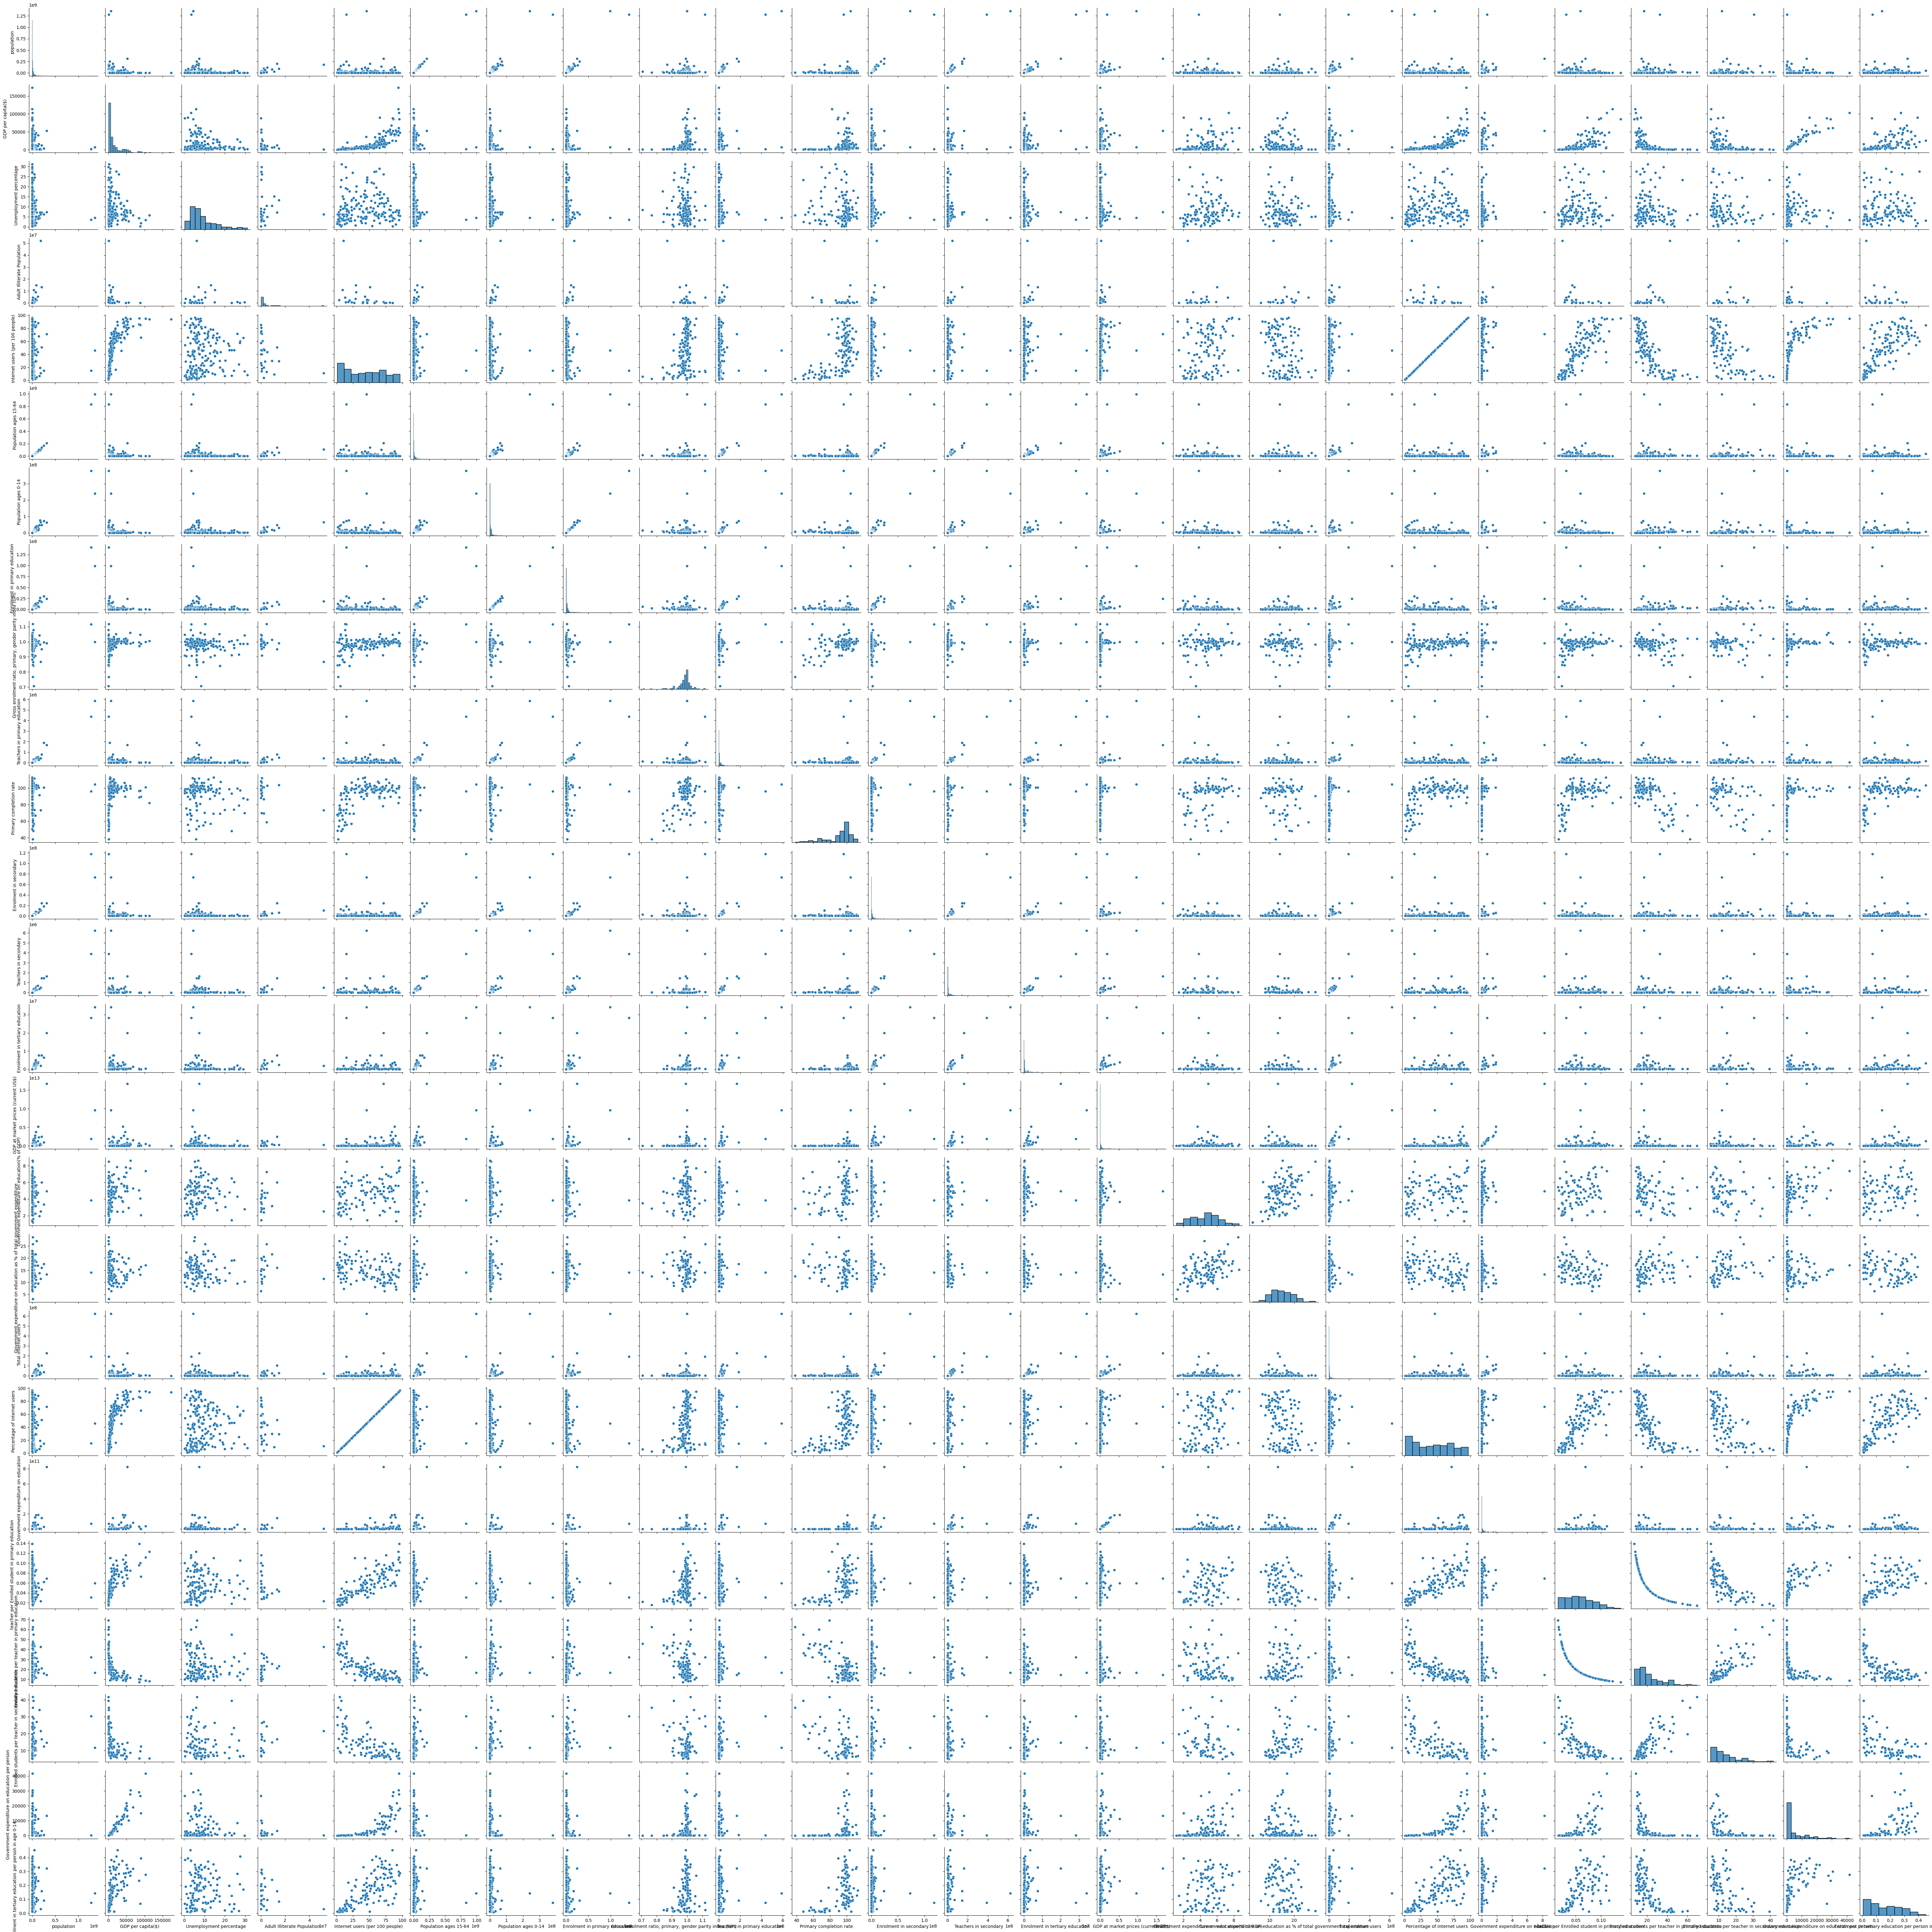

In [ ]:
# Pair Plot visualization code
country_final_numeric_df = country_final_df.drop(columns=['Country Name']).dropna(axis=1, how='all')

# Create pair plot
sns.pairplot(country_final_numeric_df)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

We can just compare any of the two columns of the dataframe instantly just with one image. As I have explained most of the important visualizations in the above graphs for any extra visualization we can refer this graph.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To enhance the global education standard, attention must be given to the following factors:

* Boost the country's per capita income.
* Enhance digital literacy by improving internet utilization.
* Increase education expenditure of the country.
* Schools need to have enough teachers for the country to develop.
* Limited involvement of women in formal education can have detrimental consequences.
* As evident from the data, several countries exhibit poor performance and require support from other nations to foster global development.
* world has to focus of improving secondary and tertiary education.
* The global community should work towards reducing economic disparities among nations and their populations.

# **Conclusion**

* Total internet users of the country is directly proportional to per capita earnings of the country.
* Increase in per capita income of the country can also bring increase in enrollment into educational institutions.
* Increase in education expenditure of the country bring increase in enrollment into educational institutions.
* Increase in teachers recruitment will be a big boost to the primary education completion rate
* In an overall perspective with few exceptions it is showing the inverse relation between the education spending and unemployment percentage.
* Among those actively seeking employment, the male population tends to face higher rates of unemployment.
* significant disparity in the number of teachers per enrolled student in secondary education between low-income and high-income countries.
* improving the education standard of the country will suerly uplift country from poverty.
* A small uptick in funding can effectively address significant teacher shortages within the country.
* 48.7% of low and lower middle income nations account for only 21.5% of internet users worldwide.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***